In [1]:
import os
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import yaml
from sklearn.model_selection import train_test_split
import pandas as pd

# Pytorch #
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from datetime import datetime

# Ensure the src directory is in sys.path
path_src = '../src'
if path_src not in sys.path:
    sys.path.insert(0,path_src)

# Corrected imports based on your src directory
from preprocessing import load_from_parquet

In [2]:
import sys
sys.path


['../src',
 '/users/pk21271/msciproject/bristol-tth-transformer-msc_project/bristol-tth-transformer-msc_project/notebooks',
 '',
 '/cvmfs/grid.cern.ch/alma9-ui-test/usr/lib64/python3.9/site-packages',
 '/cvmfs/grid.cern.ch/alma9-ui-test/usr/lib/python3.9/site-packages',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python312.zip',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12/lib-dynload',
 '/software/pk21271/miniconda3/envs/hinv-ml2/lib/python3.12/site-packages']

## Start

In [3]:
# Load parquet files

path = '/cephfs/dice/projects/CMS/Hinv/ml_datasets_ul_241111/ml_inputs_UL2018/{dataset}.parquet' # This is the newer datasets

# Load the datasets

datasets = [
    # Signal 0
    'ttH_HToInvisible_M125', 

    # ttbar processes 1
    'TTToSemiLeptonic',
    'TTTo2L2Nu',
    'TTToHadronic',

    # Z+jets processes 2
    'ZJetsToNuNu_HT-100To200',
    'ZJetsToNuNu_HT-200To400',
    'ZJetsToNuNu_HT-400To600',
    'ZJetsToNuNu_HT-600To800',
    'ZJetsToNuNu_HT-800To1200',
    'ZJetsToNuNu_HT-1200To2500',
    'ZJetsToNuNu_HT-2500ToInf',

    # W+jets processes 2
    'WJetsToLNu_HT-70To100',
    'WJetsToLNu_HT-100To200',
    'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-2500ToInf'
]

files = [
    path.format(dataset=dataset)
    for dataset in datasets
]

In [4]:
# df = load_from_parquet(files)

In [5]:
# Define class mappings
class_mappings = {
    'ttH_HToInvisible_M125': 0,  # Signal
    'TTTo': 1,                   # ttbar
    'ZJetsToNuNu': 2,           # Z+jets
    'WJetsToLNu': 2,            # W+jets
}

# Initialize class column
df['class'] = -1

# Assign classes based on dataset patterns
for pattern, class_label in class_mappings.items():
    df.loc[df["dataset"].str.contains(pattern), "class"] = class_label

NameError: name 'df' is not defined

In [ ]:
# Save the df to a new parquet file in location x 

df.to_parquet('/home/pk21271/prep_data/raw_ttH_ttbar_jets/df.parquet')

NameError: name 'df' is not defined

# From here

In [6]:
df = pd.read_parquet('/home/pk21271/prep_data/raw_ttH_ttbar_jets/df.parquet')

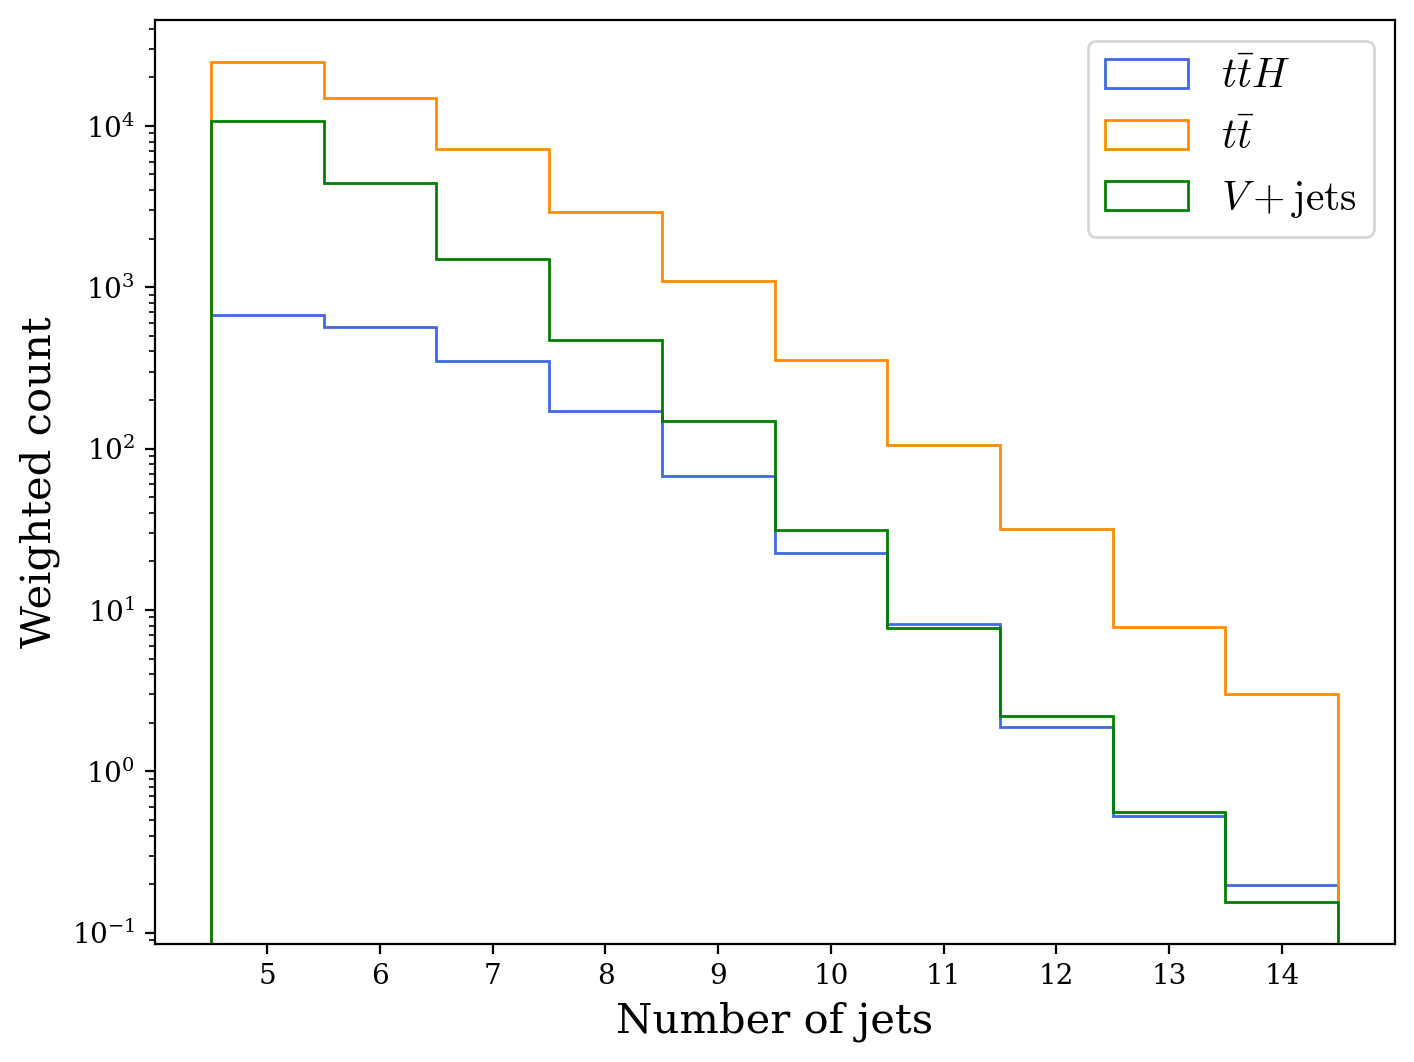

In [8]:
# Plot the histogram of the number of jets of each class

bins = np.arange(4.5, 15.5, 1)  


# Use LaTeX-style fonts without requiring a LaTeX installation
# plt.style.use('science')

plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# bins=10
plt.figure(figsize=(8, 6), dpi=200)

plt.hist(df[df['class'] == 0]['ncleanedJet'], bins=bins, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000)
plt.hist(df[df['class'] == 1]['ncleanedJet'], bins=bins, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000)
plt.hist(df[df['class'] == 2]['ncleanedJet'], bins=bins, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000)

# plt.hist(df[df['class'] == 0]['ncleanedJet'], bins=bins, linewidth=2, color='royalblue', label= r'$t\bar{t}H$', histtype='step', density=True)
# plt.hist(df[df['class'] == 1]['ncleanedJet'], bins=bins, linewidth=2, color='darkorange', label= r'$t\bar{t}$', histtype='step', density=True)
# plt.hist(df[df['class'] == 2]['ncleanedJet'], bins=bins, linewidth=2, color='g', label= r'$V + \text{jets}$', histtype='step', density=True)
# plt.yscale('log')
plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)


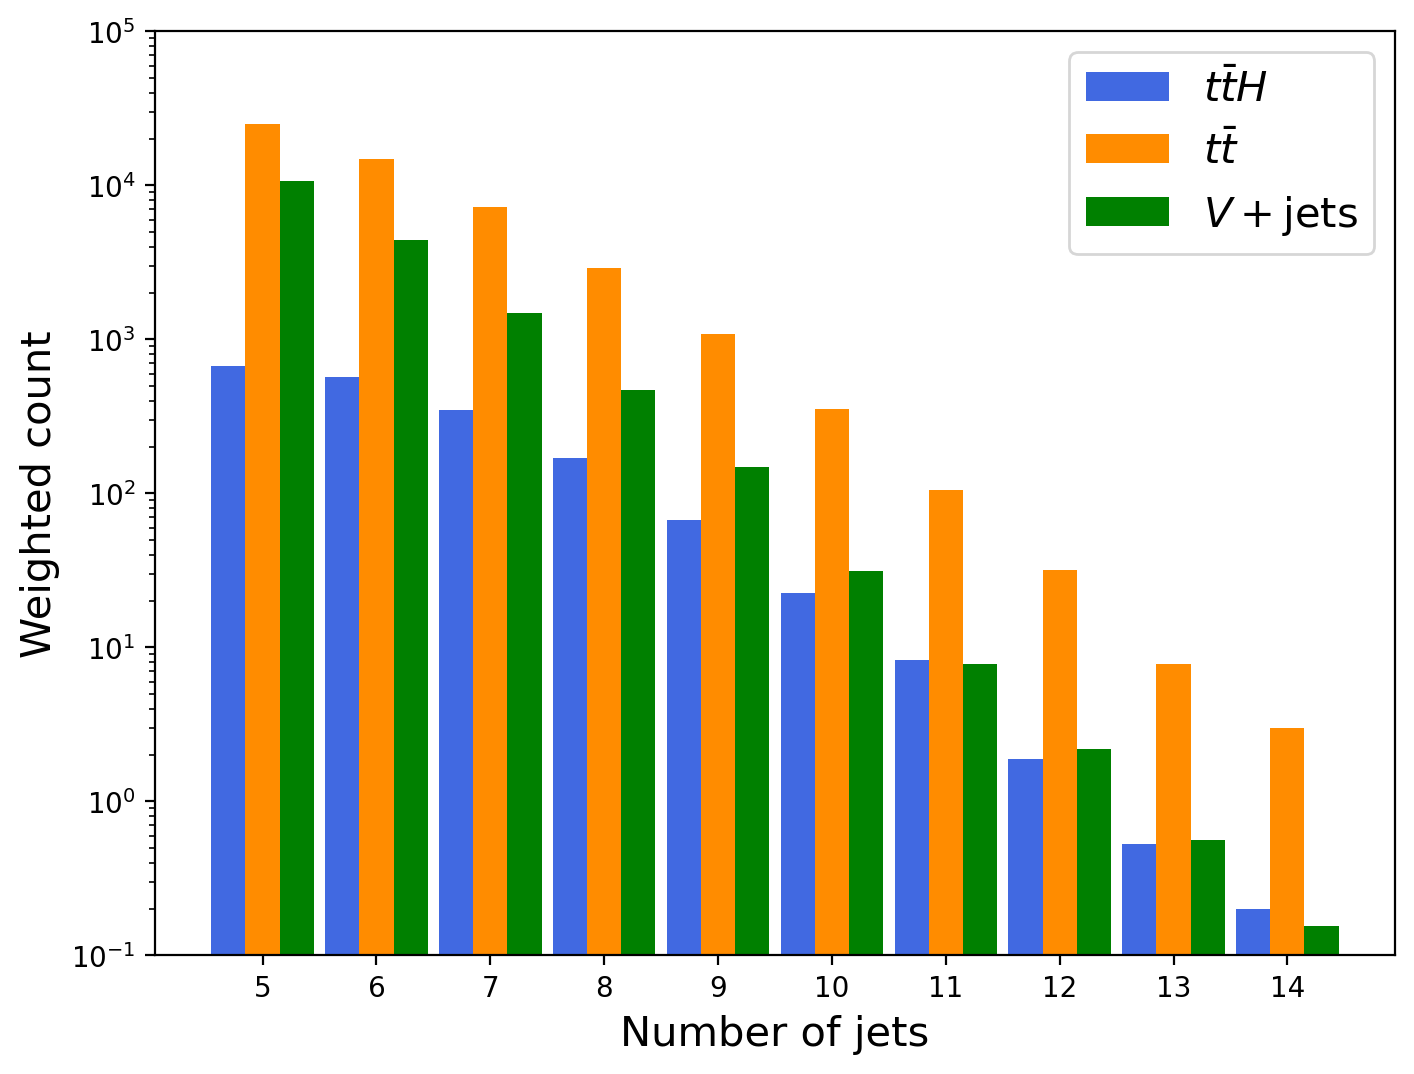

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins
bins = np.arange(4.5, 15.5, 1)  # Bin edges

# Compute histogram values for each class
hist_ttH, _ = np.histogram(df[df['class'] == 0]['ncleanedJet'], bins=bins, weights=df[df['class'] == 0]['weight_nominal'] * 200000)
hist_tt, _ = np.histogram(df[df['class'] == 1]['ncleanedJet'], bins=bins, weights=df[df['class'] == 1]['weight_nominal'] * 200000)
hist_Vjets, _ = np.histogram(df[df['class'] == 2]['ncleanedJet'], bins=bins, weights=df[df['class'] == 2]['weight_nominal'] * 200000)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2  # Midpoints of bins

# Define bar width and offsets for clarity
bar_width = 0.3  # Adjust bar width
offset = 0.3  # Shift each bar slightly to prevent overlap

plt.figure(figsize=(8, 6), dpi=200)

# Bar plots
plt.bar(bin_centers - offset, hist_ttH, width=bar_width, color='royalblue', label=r'$t\bar{t}H$', alpha=1)
plt.bar(bin_centers, hist_tt, width=bar_width, color='darkorange', label=r'$t\bar{t}$', alpha=1)
plt.bar(bin_centers + offset, hist_Vjets, width=bar_width, color='g', label=r'$V + \text{jets}$', alpha=1)


plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.ylim(1e-1, 1e5)  # Adjust y-axis limits
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)

# Labels and F


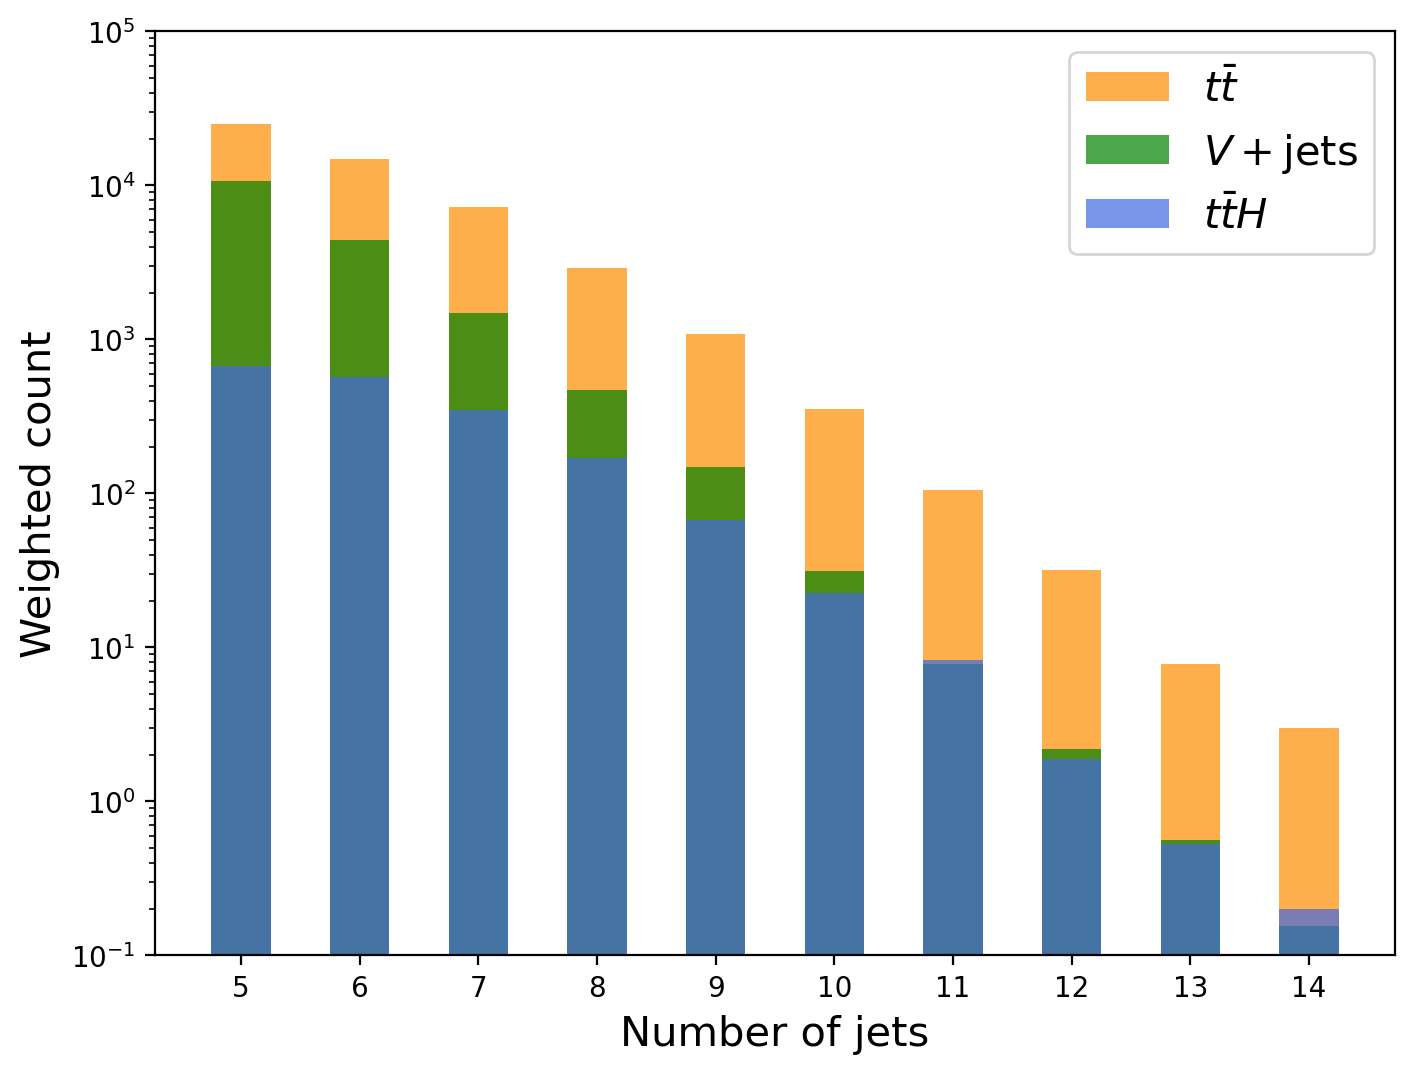

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins
bins = np.arange(4.5, 15.5, 1)  # Bin edges

# Compute histogram values for each class
hist_ttH, _ = np.histogram(df[df['class'] == 0]['ncleanedJet'], bins=bins, weights=df[df['class'] == 0]['weight_nominal'] * 200000)
hist_tt, _ = np.histogram(df[df['class'] == 1]['ncleanedJet'], bins=bins, weights=df[df['class'] == 1]['weight_nominal'] * 200000)
hist_Vjets, _ = np.histogram(df[df['class'] == 2]['ncleanedJet'], bins=bins, weights=df[df['class'] == 2]['weight_nominal'] * 200000)

# Compute bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2  # Midpoints of bins

# Define bar width and offsets for clarity
bar_width = 0.5  # Adjust bar width
offset = 0  # Shift each bar slightly to prevent overlap

plt.figure(figsize=(8, 6), dpi=200)

# Bar plots
plt.bar(bin_centers, hist_tt, width=bar_width, color='darkorange', label=r'$t\bar{t}$', alpha=0.7)
plt.bar(bin_centers + offset, hist_Vjets, width=bar_width, color='g', label=r'$V + \text{jets}$', alpha=0.7)
plt.bar(bin_centers - offset, hist_ttH, width=bar_width, color='royalblue', label=r'$t\bar{t}H$', alpha=0.7)



plt.xlabel('Number of jets', fontsize=15)
plt.ylabel('Weighted count', fontsize=15)
plt.yscale('log')
plt.ylim(1e-1, 1e5)  # Adjust y-axis limits
plt.xticks(np.arange(5, 15, 1))  # Ensure x-axis ticks are properly placed
plt.legend(fontsize=15)

# Labels and F


In [ ]:
# Print the percetnage of evenst with jets > 10

print('Percentage of events with jets > 10')
print('% jets:', len(df[(df['ncleanedJet'] > 10)]) / len(df))

print('Percentage of events with jets > 10')
print('% jets:', (df['weight_nominal'][(df['ncleanedJet'] > 10)]).sum() / df['weight_nominal'].sum())


Percentage of events with jets > 10
% jets: 0.0030576196509491033
Percentage of events with jets > 10
% jets: 0.002389196187111265


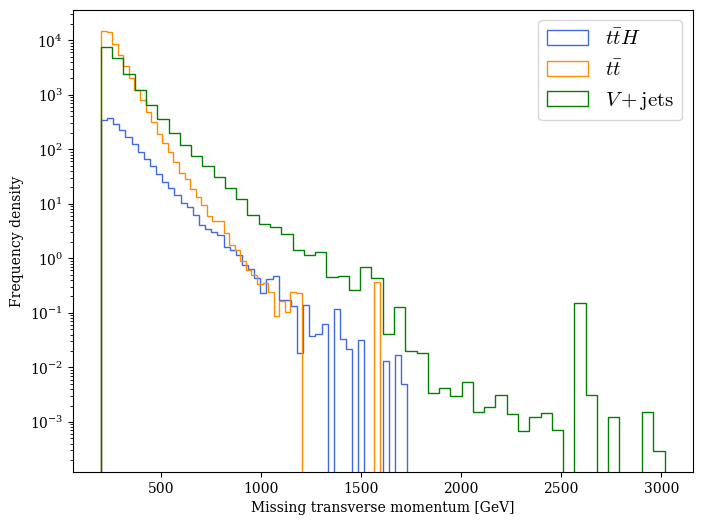

In [ ]:
# Plot the histogram of the number of jets of each class

# Use LaTeX-style fonts without requiring a LaTeX installation
plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# plt.style.use('science')
# bins=10
plt.figure(figsize=(8, 6), dpi=100)

plt.hist(df[df['class'] == 0]['InputMet_pt'], bins=50, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000)
plt.hist(df[df['class'] == 1]['InputMet_pt'], bins=50, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000)
plt.hist(df[df['class'] == 2]['InputMet_pt'], bins=50, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000)

# plt.yscale('log')
plt.xlabel('Missing transverse momentum [GeV]')
plt.ylabel('Frequency density')
plt.yscale('log')
# plt.xscale('log')
# plt.xlim(100, 1000)
# plt.ylim(0.1, 100000)
plt.legend(fontsize = 15)


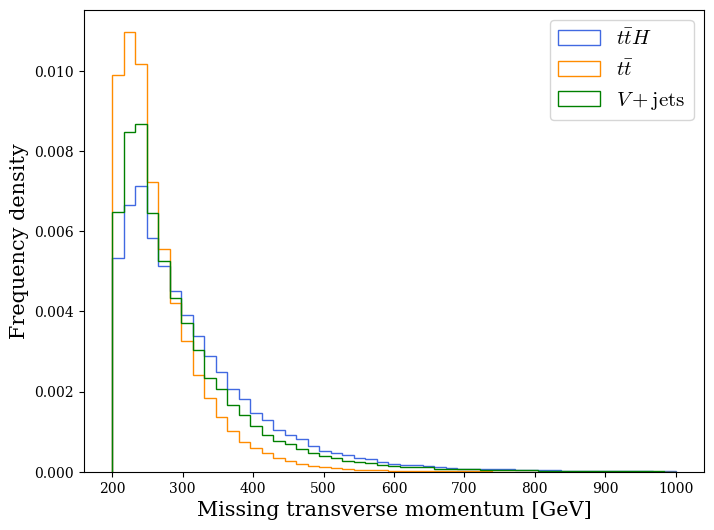

In [ ]:
# Plot the histogram of the number of jets of each class

# Use LaTeX-style fonts without requiring a LaTeX installation
plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

bin_edges = np.linspace(200, 1000, 50)  # 50 bins from 100 to 1000 GeV

plt.figure(figsize=(8, 6), dpi=100)

plt.hist(df[df['class'] == 0]['InputMet_pt'], bins=bin_edges, linewidth=1, color='royalblue', label= r'$t\bar{t}H$', histtype='step', weights = df[df['class'] == 0]['weight_nominal']*200000 ,density=True)
plt.hist(df[df['class'] == 1]['InputMet_pt'], bins=bin_edges, linewidth=1, color='darkorange', label= r'$t\bar{t}$', histtype='step', weights = df[df['class'] == 1]['weight_nominal']*200000,density=True)
plt.hist(df[df['class'] == 2]['InputMet_pt'], bins=bin_edges, linewidth=1, color='g', label= r'$V + \text{jets}$', histtype='step', weights = df[df['class'] == 2]['weight_nominal']*200000,density=True)

# plt.yscale('log')
plt.xlabel('Missing transverse momentum [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize= 15)
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim(100, 1000)
# plt.ylim(0.1, 100000)
plt.legend(fontsize = 15)


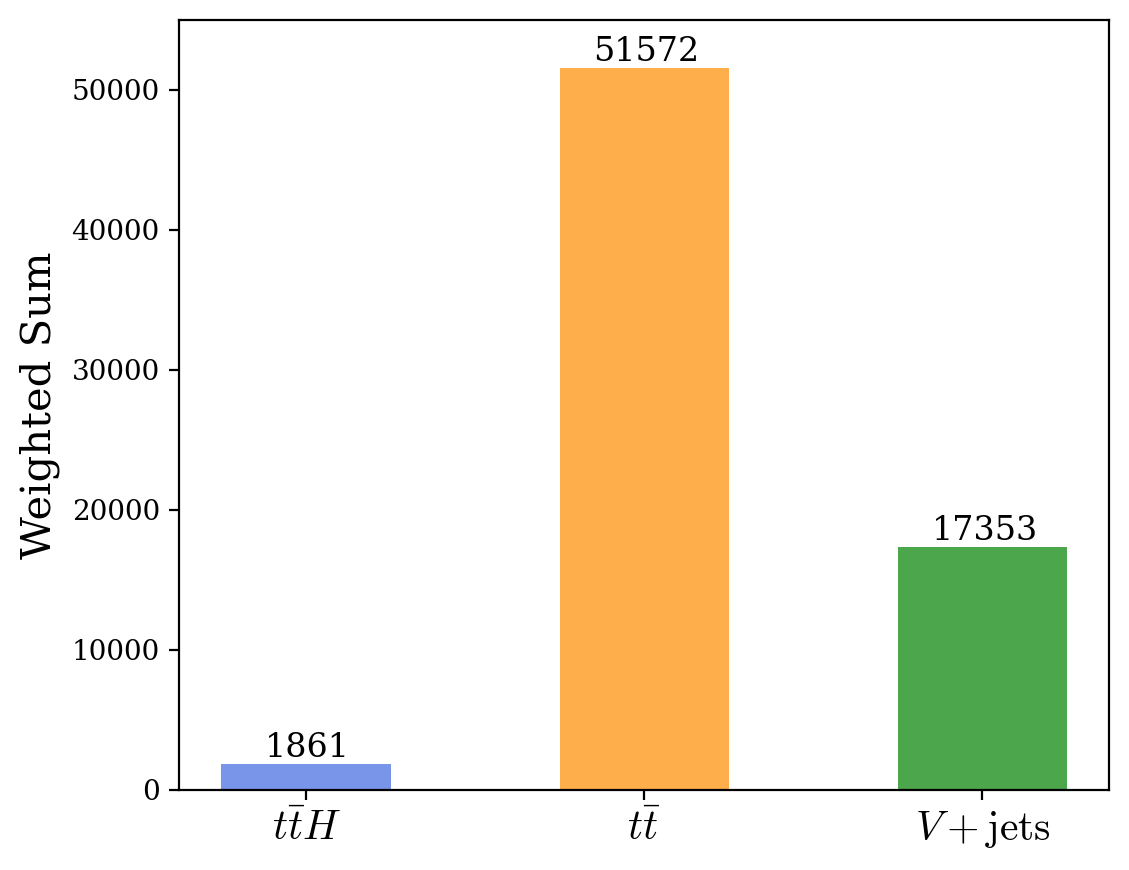

In [ ]:
# Compute weights
wttH = df['weight_nominal'][df['class'] == 0].sum() * 200000
wtt = df['weight_nominal'][df['class'] == 1].sum()* 200000
wz = df['weight_nominal'][df['class'] == 2].sum()* 200000

# Bar plot
bar_positions = [0, 1, 2]
bar_values = [wttH, wtt, wz]
bar_colors = ['royalblue', 'darkorange', 'g']

plt.figure(figsize=(6, 5), dpi=200)
plt.bar(bar_positions, bar_values, color=bar_colors, width =0.5, alpha=0.7)

# Set x-ticks
plt.xticks(bar_positions, [r'$t\bar{t}H$', r'$t\bar{t}$', r'$V + \text{jets}$'] , fontsize=15)
# plt.yticks(fontsize=15)

plt.text(-0.12, wttH+500, f'{wttH:.0f}', fontsize=12)
plt.text(0.85, wtt + 500, f'{wtt:.0f}', fontsize=12)
plt.text(1.85, wz + 500, f'{wz:.0f}', fontsize=12)
plt.ylim(0, 55000)


plt.ylabel("Weighted Sum", fontsize=15)
plt.show()


# Features plot

In [ ]:
# ttH_pt = df[df['class'] == 0]['cleanedJet_pt'].apply(lambda x: x[0])
# tt_pt = df[df['class'] == 1]['cleanedJet_pt'].apply(lambda x: x[0])
# Vjets_pt = df[df['class'] == 2]['cleanedJet_pt'].apply(lambda x: x[0])

ttH_pt = df[df['class'] == 0]['cleanedJet_pt'].explode()
tt_pt = df[df['class'] == 1]['cleanedJet_pt'].explode()
Vjets_pt = df[df['class'] == 2]['cleanedJet_pt'].explode()

ttH_weights_expanded = np.repeat(df[df['class']==0]['weight_nominal'].values, df[df['class']==0]['cleanedJet_pt'].str.len())
tt_weights_expanded = np.repeat(df[df['class']==1]['weight_nominal'].values, df[df['class']==1]['cleanedJet_pt'].str.len())
Vjets_weights_expanded = np.repeat(df[df['class']==2]['weight_nominal'].values, df[df['class']==2]['cleanedJet_pt'].str.len())


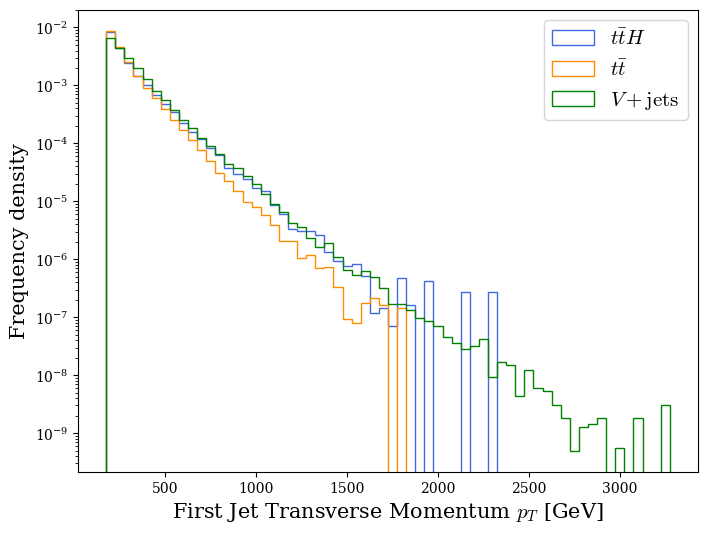

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(175, 3275, 63)

plt.rcParams.update({
    "font.family": "serif",  # Use serif fonts (like LaTeX)
    "mathtext.fontset": "cm"  # Use Computer Modern (LaTeX default font)
})

# plt.hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = df[df['class'] == 0]['weight_nominal']*200000)
# plt.hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = df[df['class'] == 1]['weight_nominal']*200000)
# plt.hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = df[df['class'] == 2]['weight_nominal']*200000)

plt.hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, linewidth=1)
plt.hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, linewidth=1)
plt.hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)
# plt.ylim(1e-5, 1e-1)
# plt.xlim(0, 1000)
# plt.xscale('log')
plt.show()

In [ ]:
# ttH_eta = df[df['class'] == 0]['cleanedJet_eta'].apply(lambda x: x[0])
# tt_eta = df[df['class'] == 1]['cleanedJet_eta'].apply(lambda x: x[0])
# Vjets_eta = df[df['class'] == 2]['cleanedJet_eta'].apply(lambda x: x[0])

ttH_eta = df[df['class'] == 0]['cleanedJet_eta'].explode()
tt_eta = df[df['class'] == 1]['cleanedJet_eta'].explode()
Vjets_eta = df[df['class'] == 2]['cleanedJet_eta'].explode()

print(Vjets_eta.min())
print(Vjets_eta.max())

-4.8710938
4.890625


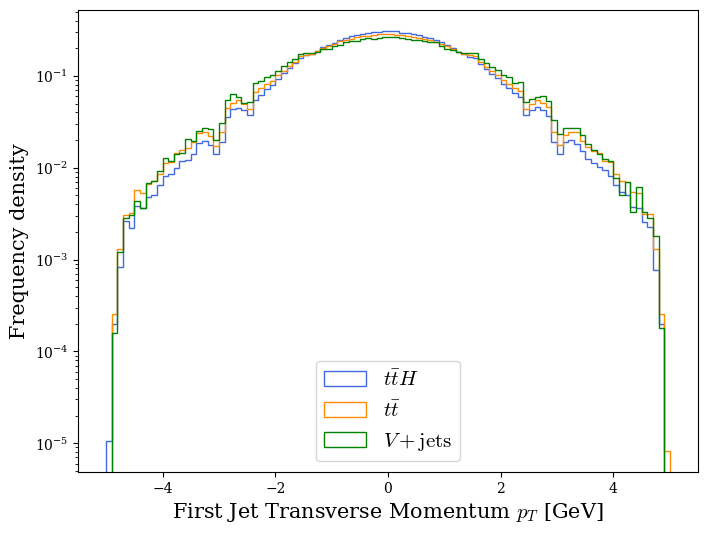

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(-5, 5, 101)

plt.hist(ttH_eta, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(tt_eta, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(Vjets_eta, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

In [ ]:
ttH_btag = df[df['class'] == 0]['cleanedJet_btagDeepFlavB'].explode()
tt_btag = df[df['class'] == 1]['cleanedJet_btagDeepFlavB'].explode()
Vjets_btag = df[df['class'] == 2]['cleanedJet_btagDeepFlavB'].explode()

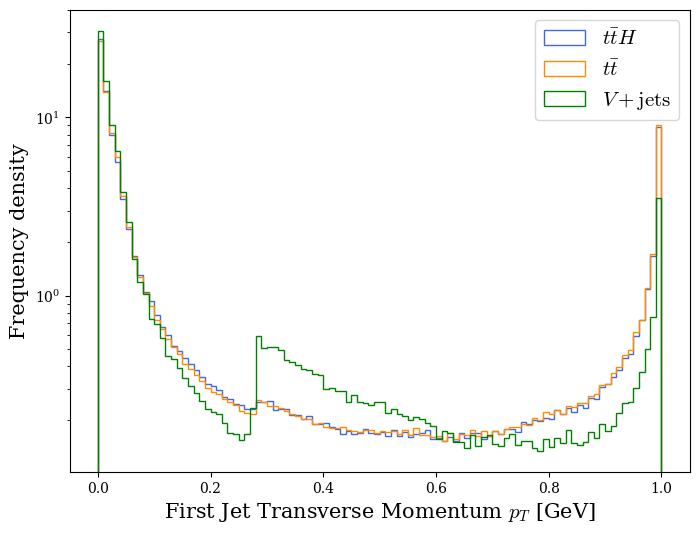

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

bins = np.linspace(0, 1, 101)

plt.hist(ttH_btag, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(tt_btag, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
plt.hist(Vjets_btag, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)


plt.xlabel('First Jet Transverse Momentum $p_T$ [GeV]', fontsize=15)
plt.ylabel('Frequency density', fontsize=15)
plt.yscale('log')
plt.legend(fontsize=15)

plt.show()

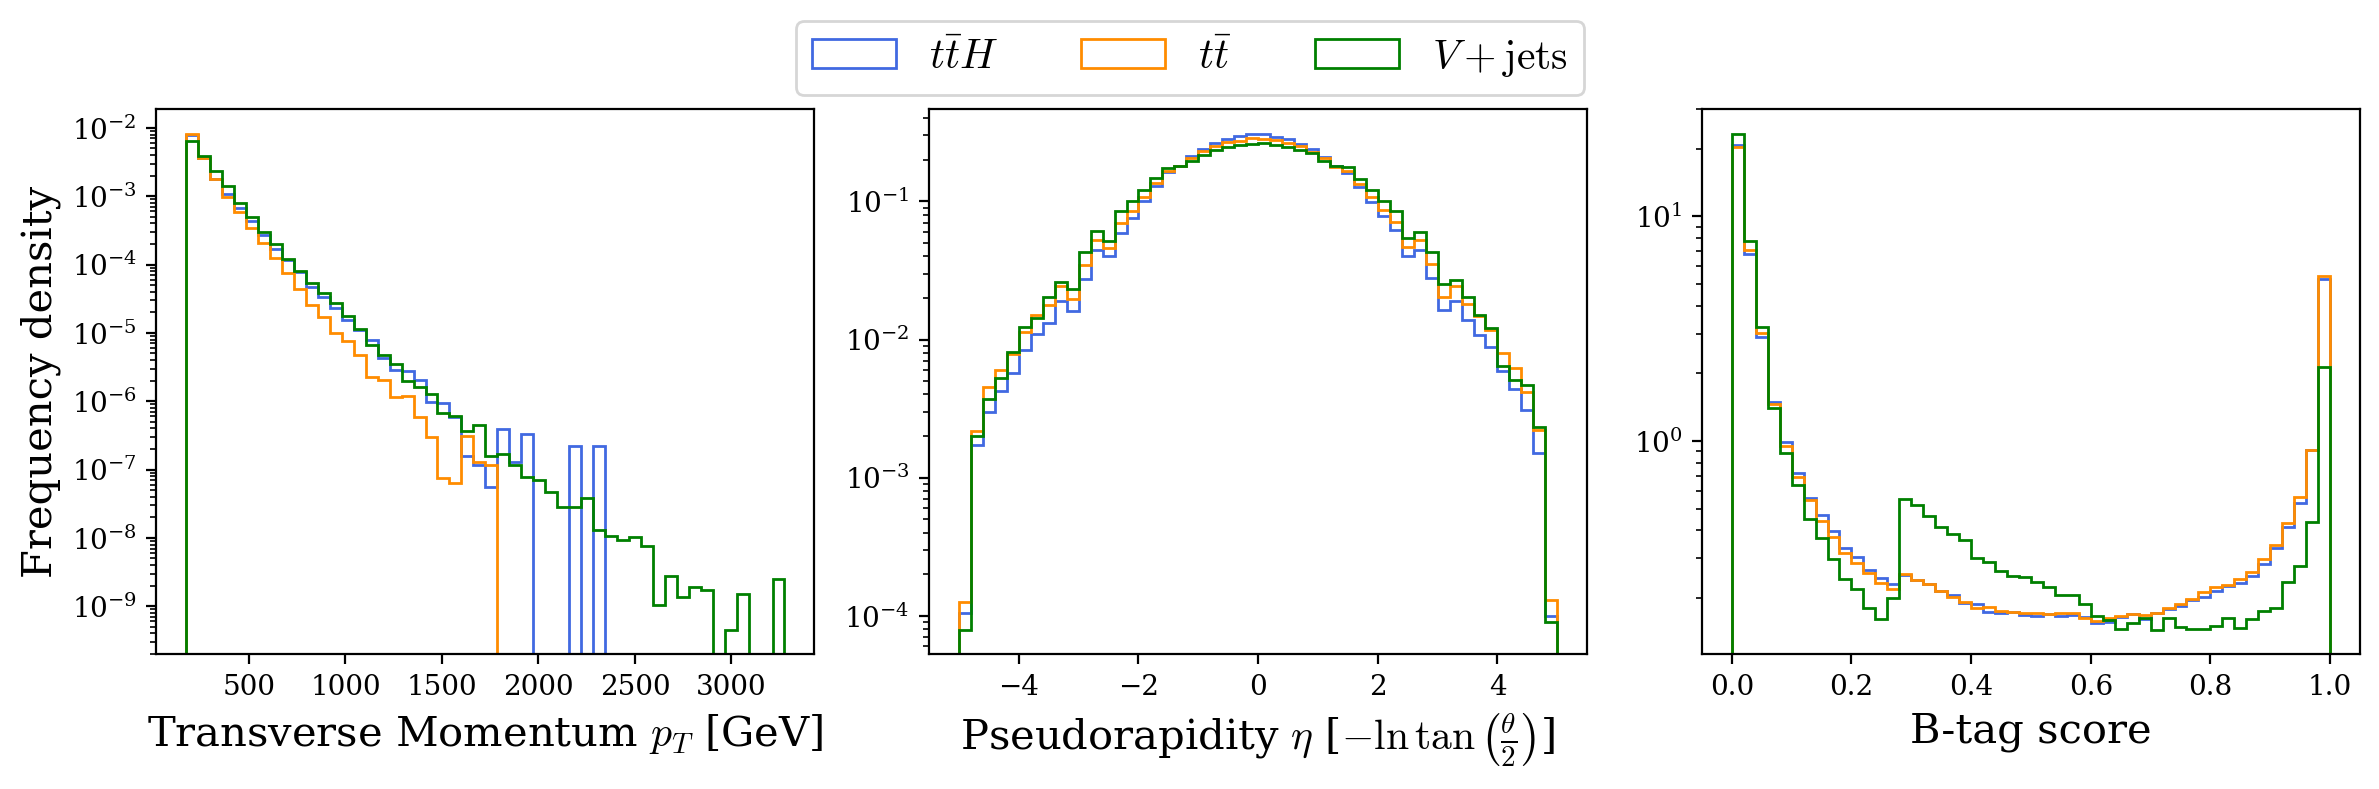

In [ ]:
# Now plot together

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=200)

bins = np.linspace(175, 3275, 51)

axs[0].hist(ttH_pt, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, linewidth=1)
axs[0].hist(tt_pt, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, linewidth=1)
axs[0].hist(Vjets_pt, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, linewidth=1)

axs[0].set_xlabel('Transverse Momentum $p_T$ [GeV]', fontsize=15)
axs[0].set_ylabel('Frequency density', fontsize=15)
axs[0].set_yscale('log')

bins = np.linspace(-5, 5, 51)

axs[1].hist(ttH_eta, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
axs[1].hist(tt_eta, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
axs[1].hist(Vjets_eta, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)

axs[1].set_xlabel(r'Pseudorapidity $\eta$ [$-\ln \tan \left(\frac{\theta}{2} \right)$]', fontsize=15)
axs[1].set_yscale('log')

bins = np.linspace(0, 1, 51)

axs[2].hist(ttH_btag, bins=bins, histtype='step', color='royalblue', label=r'$t\bar{t}H$', density=True, weights = ttH_weights_expanded*200000, alpha = 1, linewidth=1)
axs[2].hist(tt_btag, bins=bins, histtype='step', color='darkorange', label=r'$t\bar{t}$', density=True, weights = tt_weights_expanded*200000, alpha = 1, linewidth=1)
axs[2].hist(Vjets_btag, bins=bins, histtype='step', color='g', label=r'$V + \text{jets}$', density=True, weights = Vjets_weights_expanded*200000, alpha = 1, linewidth=1)

axs[2].set_xlabel('B-tag score', fontsize=15)
axs[2].set_yscale('log')

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()



<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2385735/2121441803.py:32: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('Standard Deviations ($\sigma$)')


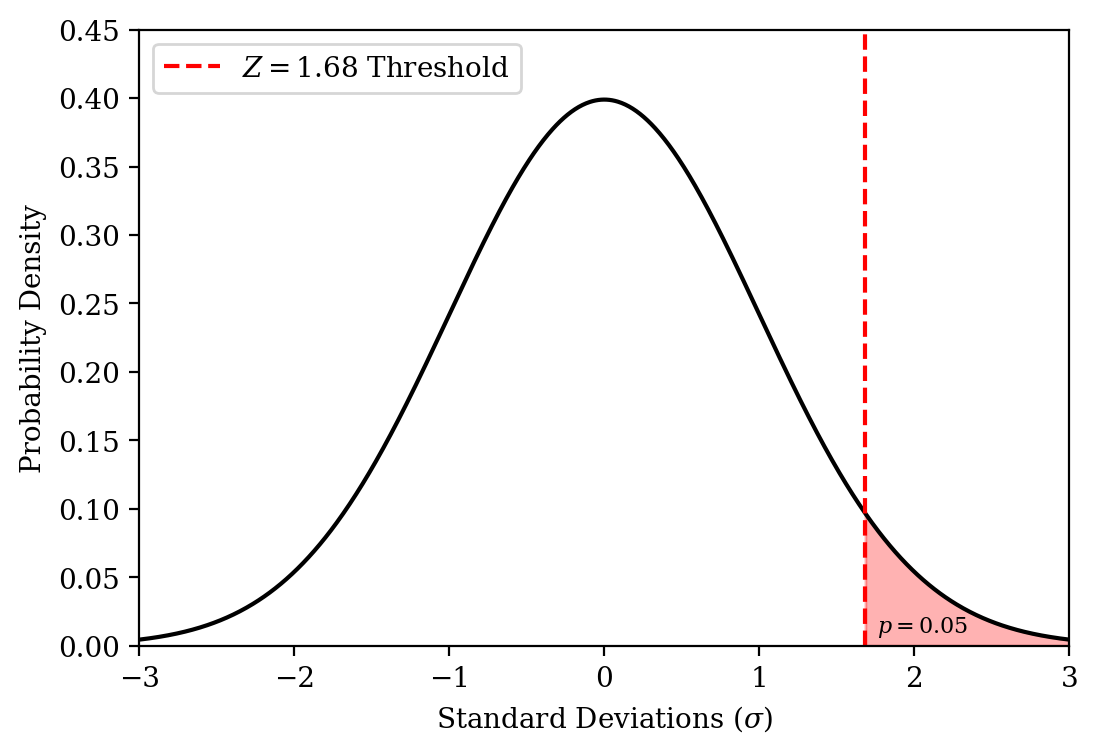

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configure plot aesthetics
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'mathtext.fontset': 'dejavuserif'
})

# Create figure
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

# Generate x values and corresponding normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x)

# Plot normal distribution
ax.plot(x, y, 'k-', linewidth=1.5)
ax.fill_between(x, y, where=(x >= 1.68), color='red', alpha=0.3)


# Highlight Z = 1.68 threshold
ax.axvline(x=1.68, linestyle='--', color='red', linewidth=1.5, label=r'$Z = 1.68$ Threshold')

ax.text(1.76,0.01, r'$p=0.05$', fontsize=8)

# Set axis labels and limits
ax.set_xlim(-3, 3)
ax.set_ylim(0, 0.45)
ax.set_xlabel('Standard Deviations ($\sigma$)')
ax.set_ylabel('Probability Density')
plt.legend()
# ax.set_title('Normal Distribution with $Z = 1.68$ Threshold')

plt.show()


# Results

In [63]:
# Binary classifier MLP

import torch
import matplotlib.pyplot as plt
import numpy as np

labels = torch.load('/home/pk21271/prep_data/mlp_binary_raw/labels.pt')
preds_raw = torch.load('/home/pk21271/prep_data/mlp_binary_raw/preds_raw.pt')
wn_val = torch.load('/home/pk21271/prep_data/mlp_binary_raw/wn_val.pt')

preds = torch.cat(preds_raw, dim=0)
print(wn_val.sum())

tensor(24888.0645)


/tmp/ipykernel_3133229/3434452811.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels = torch.load('/home/pk21271/prep_data/mlp_binary_raw/labels.pt')
/tmp/ipykernel_

In [2]:
wn = np.array((wn_val).flatten())
probs = torch.sigmoid(preds).detach().cpu().numpy().flatten()
labels = labels.cpu().numpy()


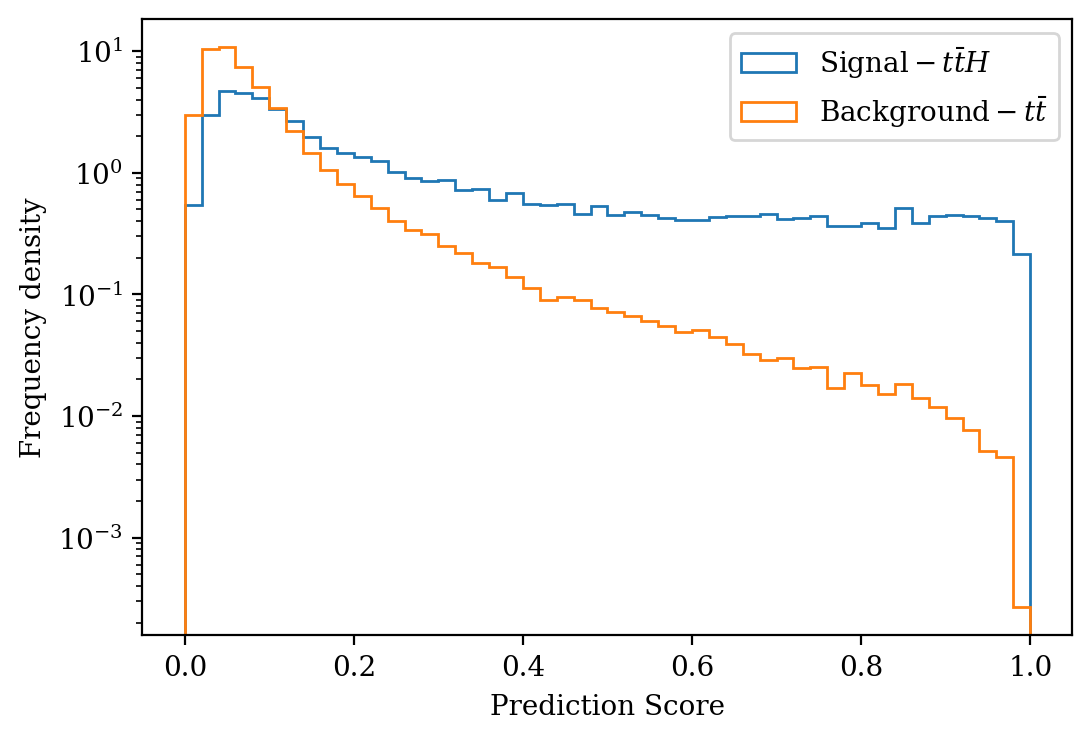

In [3]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'mathtext.fontset': 'dejavuserif'
})

bins = np.linspace(0, 1, 51)

plt.figure(figsize=(6, 4), dpi=200)

plt.hist(probs[labels == 1], bins=bins, range=(0, 1), weights=wn[labels == 1], histtype='step', label=r'$\text{Signal} - t\bar{t}H$', density = True)
plt.hist(probs[labels == 0], bins=bins, range=(0, 1), weights=wn[labels == 0], histtype='step', label=r'$\text{Background}- t\bar{t}$', density = True)
plt.legend()  
plt.xlabel('Prediction Score')
plt.ylabel('Frequency density')
# plt.title('Prediction distribution (normalised)')   
plt.yscale('log')
# plt.ylim(5e-3, 20)
plt.show()

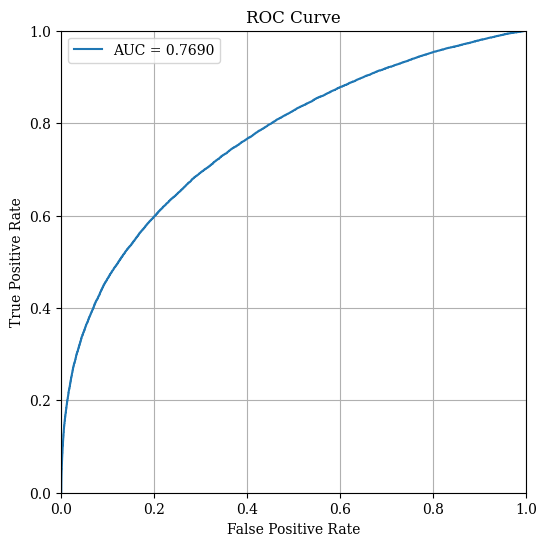

In [4]:
# Plot roc curve

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(labels, probs, sample_weight=wn)
auc = roc_auc_score(labels, probs, sample_weight=wn)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

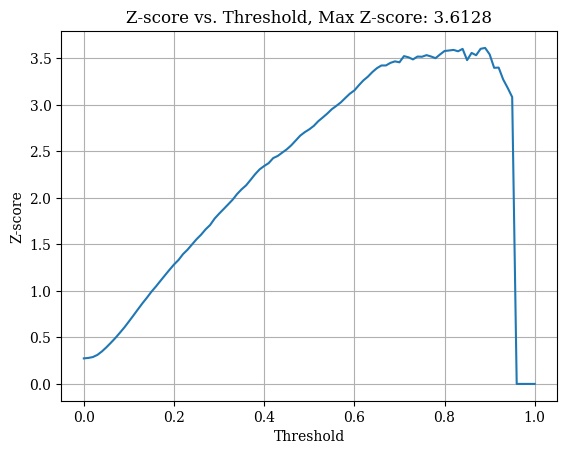

In [5]:
# Assume w_test is the array of weights for each sample in the test set


# Define thresholds between 0 and 1
thresholds = np.linspace(0, 1, 101)
z_scores = []

# Calculate the Z-score for each threshold using weights
for threshold in thresholds:
    # Weighted count of signal predictions above the threshold
    S = np.sum(wn[(probs > threshold) & (labels == 1)])  # Weighted Signal
    B = np.sum(wn[(probs > threshold) & (labels == 0)])  # Weighted Background
    sig_B = B * 0.05 # 5% error    
    if S and B > 3:
        Z = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z = 0

    z_scores.append(Z)

# Plot Z-score vs. Threshold
plt.plot(thresholds, z_scores, label="Z-score")
plt.xlabel("Threshold")
plt.ylabel("Z-score")
plt.title(f"Z-score vs. Threshold, Max Z-score: {max(z_scores[:95]):.4f}")
plt.grid()
# plt.ylim(0,6)
# plt.xlim(0,1)
plt.show()

In [6]:
# Binary classifier MLP

import torch
import matplotlib.pyplot as plt
import numpy as np

labels2 = torch.load('/home/pk21271/prep_data/transformer_binary/labels.pt')
preds2 = torch.load('/home/pk21271/prep_data/transformer_binary/preds.pt')
weights2 = torch.load('/home/pk21271/prep_data/transformer_binary/val_nom.pt')

# preds = torch.cat(preds_raw, dim=0)

/tmp/ipykernel_2888814/2056297130.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  labels2 = torch.load('/home/pk21271/prep_data/transformer_binary/labels.pt')
/tmp/ipyke

In [7]:
wn2 = np.array((weights2 * 200000).flatten())
probs2 = torch.sigmoid(preds2).detach().cpu().numpy().flatten()
labels2 = (labels2.cpu().numpy()).squeeze()


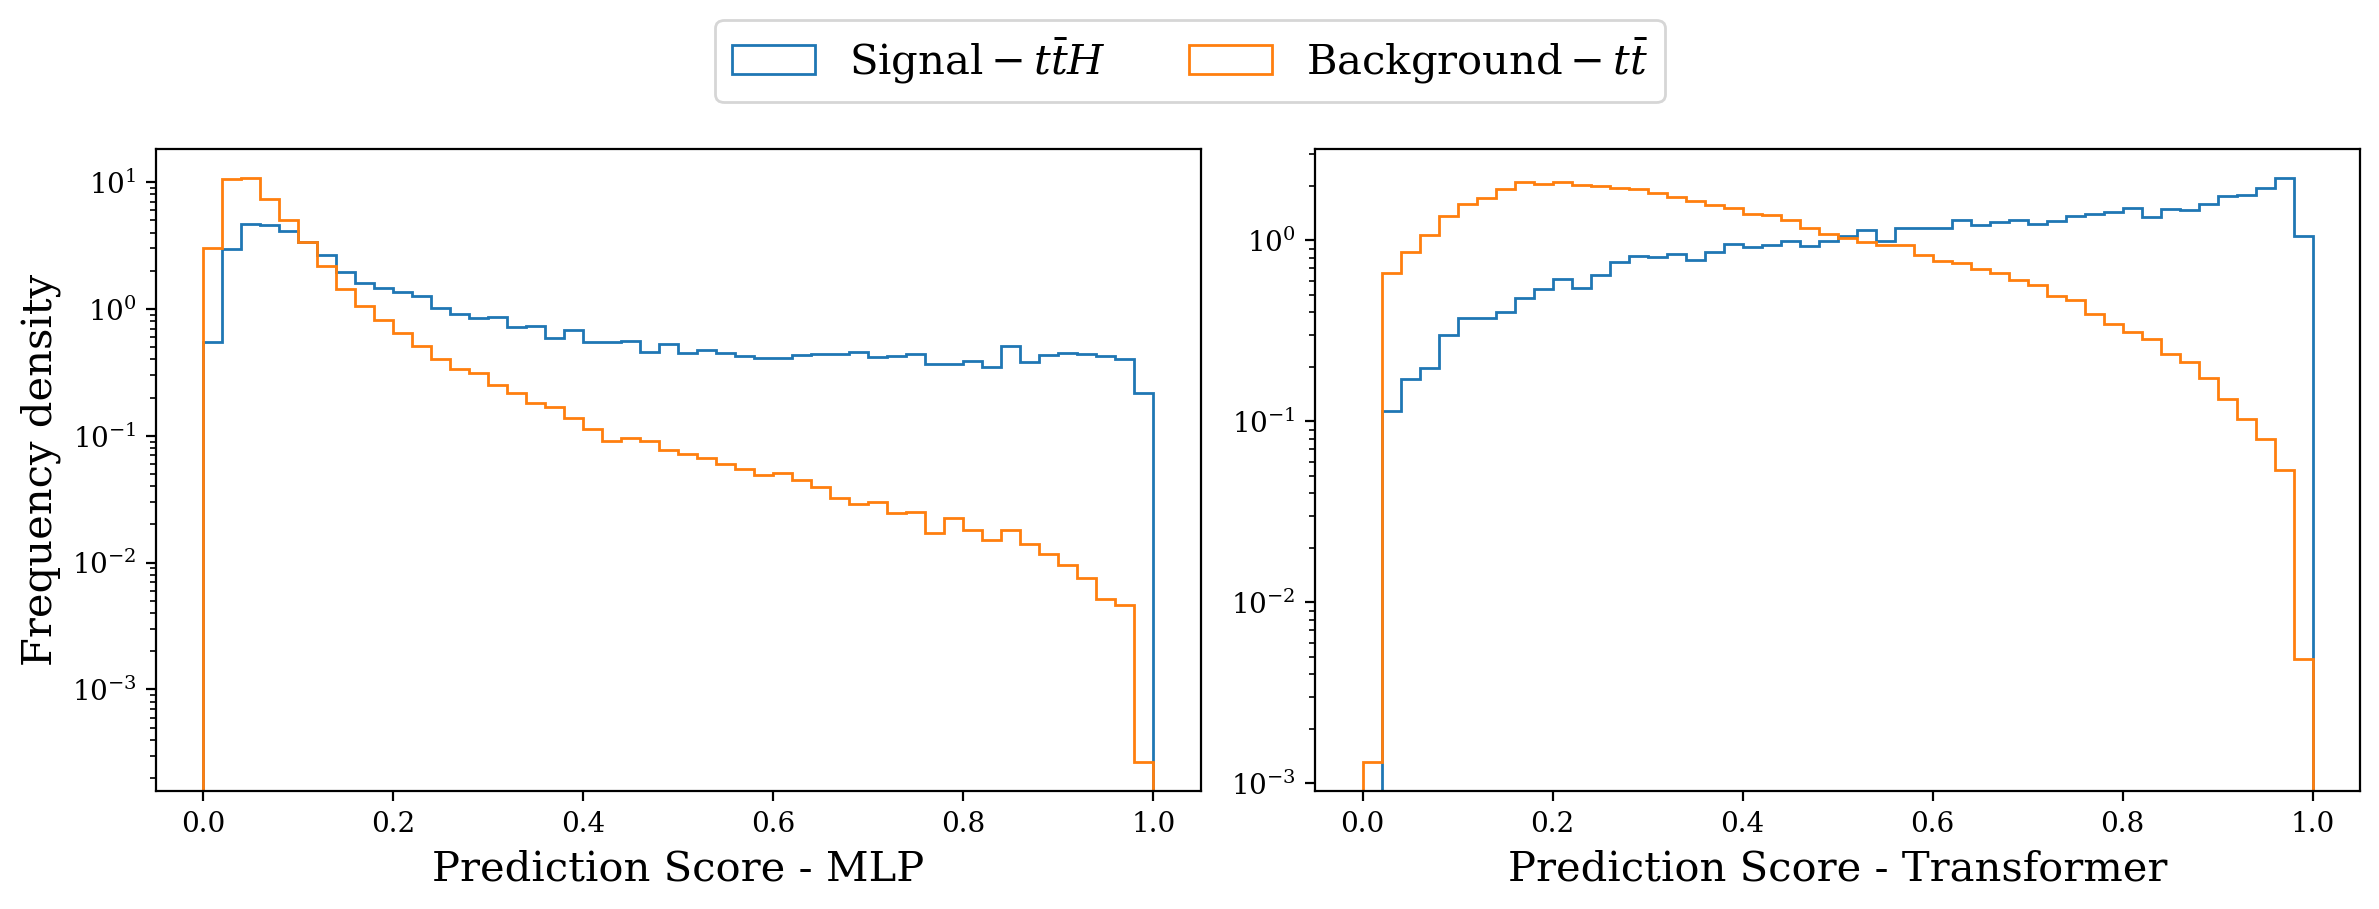

In [8]:
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'mathtext.fontset': 'dejavuserif'
})

bins = np.linspace(0, 1, 51)

import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=200)

# Left subplot: Signal histogram
axs[0].hist(probs[labels == 1], bins=bins, range=(1, 1), weights=wn[labels == 1], histtype='step', label=r'$\text{Signal} - t\bar{t}H$',density=True)
axs[0].hist(probs[labels == 0], bins=bins, range=(1, 1), weights=wn[labels == 0], histtype='step', label=r'$\text{Background} - t\bar{t}$',density=True)

axs[0].set_xlabel('Prediction Score - MLP', fontsize=15)
axs[0].set_ylabel('Frequency density', fontsize=15)
axs[0].set_yscale('log')

axs[1].hist(probs2[labels2 == 1], bins=bins, range=(0, 1), weights=wn2[labels2 == 1], histtype='step', label=r'$\text{Signal} - t\bar{t}H$',density=True)
axs[1].hist(probs2[labels2 == 0], bins=bins, range=(0, 1), weights=wn2[labels2 == 0], histtype='step', label=r'$\text{Background} - t\bar{t}$',density=True)


axs[1].set_xlabel('Prediction Score - Transformer', fontsize=15)
axs[1].set_yscale('log')

handles, names = axs[0].get_legend_handles_labels()
fig.legend(handles, names, loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize=15)


plt.tight_layout()
plt.show()



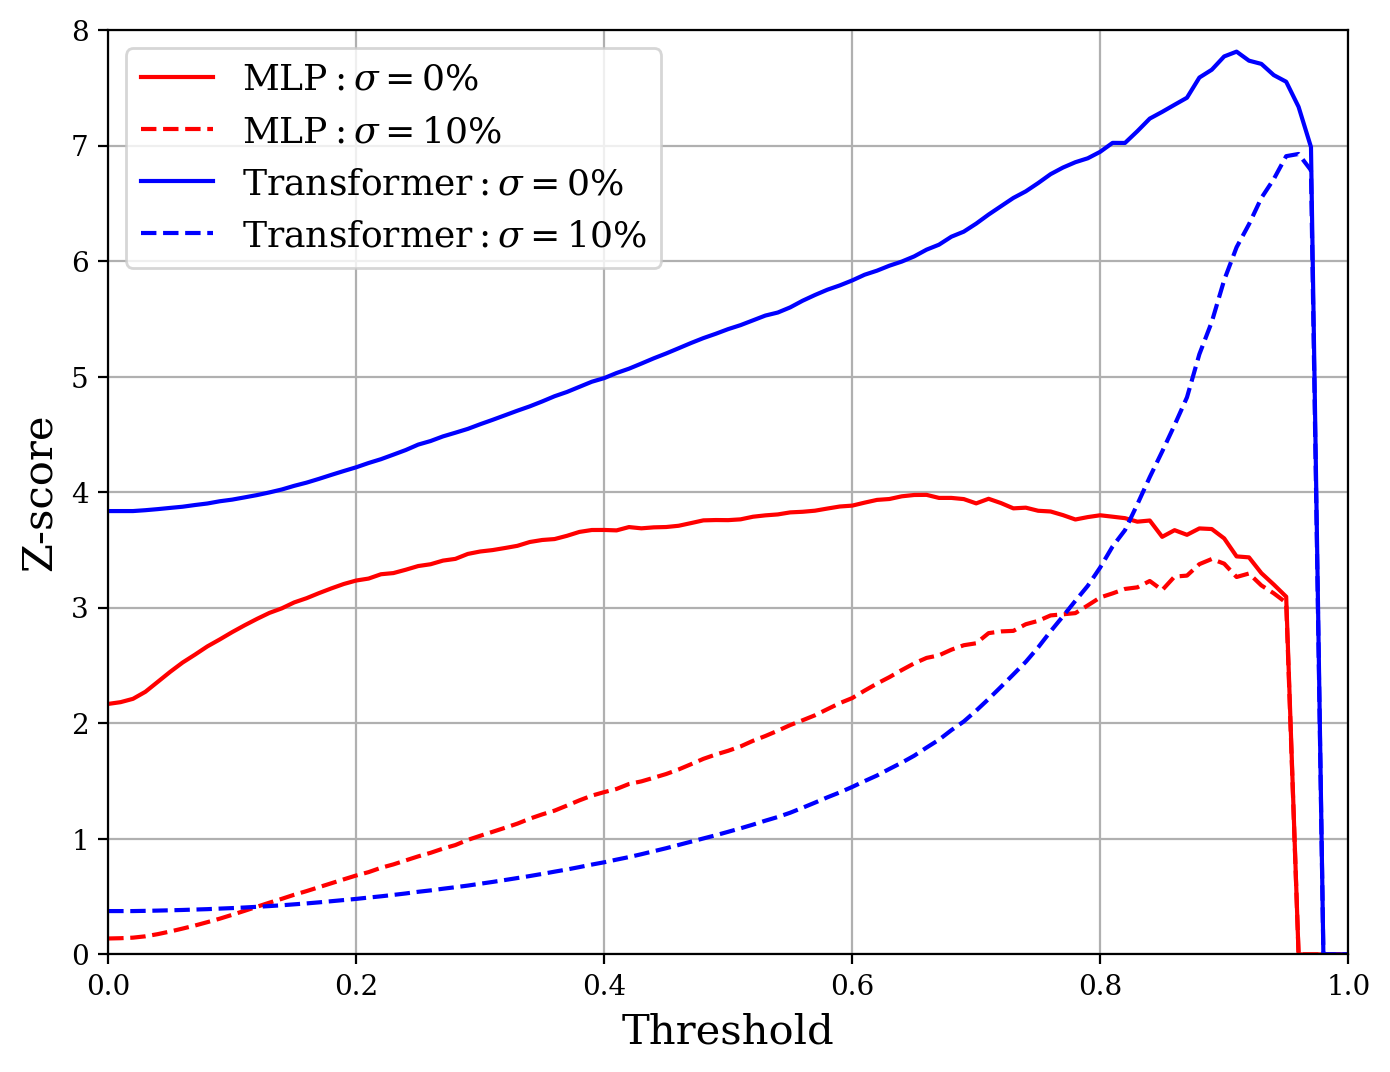

In [42]:
# Assume w_test is the array of weights for each sample in the test set


# Define thresholds between 0 and 1
thresholds = np.linspace(0, 1, 101)
z_scores = []
z_scores_err = []

# Calculate the Z-score for each threshold using weights
for threshold in thresholds:
    # Weighted count of signal predictions above the threshold
    S = np.sum(wn[(probs > threshold) & (labels == 1)])  # Weighted Signal
    B = np.sum(wn[(probs > threshold) & (labels == 0)])  # Weighted Background
    sig_B = B * 0 # 5% error    
    if S and B > 3:
        Z = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z = 0

    sig_B = B * 0.1 # 5% error    
    if S and B > 3:
        Z_err = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z_err = 0

    z_scores.append(Z)
    z_scores_err.append(Z_err)

z_scores2 = []
z_scores2_err = []

# Calculate the Z-score for each threshold using weights
for threshold in thresholds:
    # Weighted count of signal predictions above the threshold
    S = np.sum(wn2[(probs2 > threshold) & (labels2 == 1)])  # Weighted Signal
    B = np.sum(wn2[(probs2 > threshold) & (labels2 == 0)])  # Weighted Background
    sig_B = B * 0 # 5% error    
    if S and B > 3:
        Z = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z = 0

    sig_B = B * 0.1 # 5% error    
    if S and B > 3:
        Z_err = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z_err = 0

    z_scores2.append(Z)
    z_scores2_err.append(Z_err)

plt.figure(figsize=(8, 6), dpi=200)


# Plot Z-score vs. Threshold
plt.plot(thresholds, z_scores, label=r"$\text{MLP}: \sigma = 0\%$", color='red')
plt.plot(thresholds, z_scores_err, label=r"$\text{MLP}: \sigma = 10\%$", color='red', linestyle='--')
plt.plot(thresholds, z_scores2, label=r"$\text{Transformer}: \sigma = 0\%$", color='blue')
plt.plot(thresholds, z_scores2_err, label=r"$\text{Transformer}: \sigma = 10\%$", color='blue', linestyle='--')


plt.xlabel("Threshold", fontsize=15)
plt.ylabel("Z-score", fontsize=15)
plt.grid()
plt.ylim(0,8)
plt.xlim(0,1)
plt.legend(fontsize = 13)
plt.show()

In [39]:
print(max(z_scores), np.argmax(z_scores))
print(max(z_scores2), np.argmax(z_scores2))
print(max(z_scores_err), np.argmax(z_scores_err))
print(max(z_scores2_err), np.argmax(z_scores2_err))

3.979044 66
7.8165307 91
3.423744 89
6.930596 96


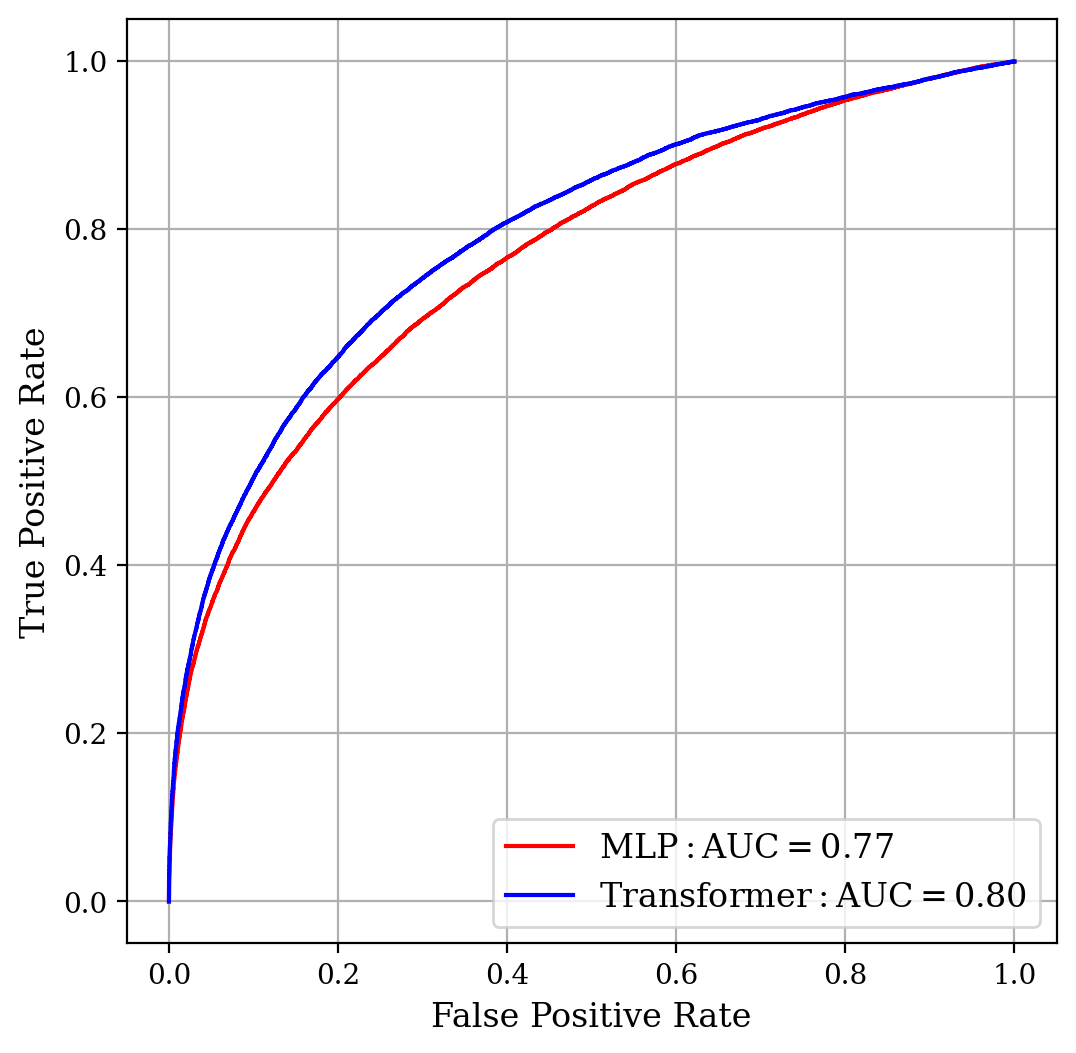

0.005711122412479817 0.13863608014107068
0.006085039262701114 0.15883836345775246
0.0006406763932378027 0.042980917546676045
0.001170552689107074 0.06541499942741068


In [70]:
# Plot roc curve

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(labels, probs, sample_weight=wn)
auc = roc_auc_score(labels, probs, sample_weight=wn)

fpr2, tpr2, _2 = roc_curve(labels2, probs2, sample_weight=wn2)
auc2 = roc_auc_score(labels2, probs2, sample_weight=wn2)

idx1 = np.argmin(np.abs(_ - 0.66)) # MLP 0
idx2 = np.argmin(np.abs(_2 - 0.91)) # Tran 0
idx3 = np.argmin(np.abs(_ - 0.89)) # MLP 10
idx4 = np.argmin(np.abs(_2 - 0.96)) # Tran 0

plt.figure(figsize=(6, 6), dpi = 200)
plt.plot(fpr, tpr, label=r"$\text{MLP}: \text{AUC} = 0.77$", color='red')
plt.plot(fpr2, tpr2, label=r"$\text{Transformer}: \text{AUC} = 0.80$", color='blue')

# plt.plot(fpr[idx1], tpr[idx1], 'ro')
# plt.plot(fpr2[idx2], tpr2[idx2], 'bo')

# plt.plot(fpr[idx3], tpr[idx3], 'rx')
# plt.plot(fpr2[idx4], tpr2[idx4], 'bx')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
# plt.title("ROC Curve")
plt.grid()
plt.legend(fontsize=12)
# plt.ylim(0, 1)
# plt.xlim(0, 1)
# plt.xscale('log')
plt.show()

print(fpr[idx1], tpr[idx1])
print(fpr2[idx2], tpr2[idx2])
print(fpr[idx3], tpr[idx3])
print(fpr2[idx4], tpr2[idx4])

In [52]:
print(idx1, idx2)

4552 6320


Confusion Matrix:
[[0.13863608 0.86136392]
 [0.00571112 0.99428888]]


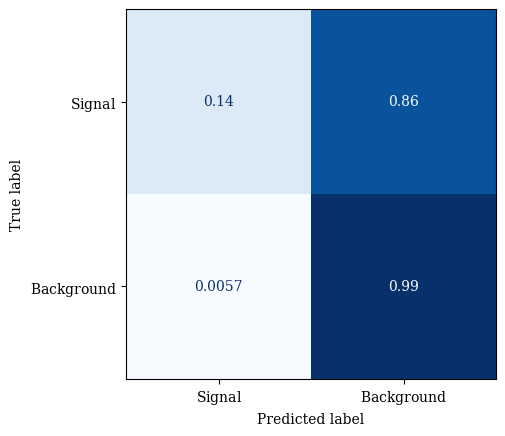

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.66

# Convert probabilities to binary predictions:
# If p > threshold, predict 1 (signal); otherwise, predict 0 (background)
preds = [1 if p > threshold else 0 for p in probs]

# Compute the confusion matrix with the desired label ordering:
# Here, labels=[1, 0] will place signal (1) in the top row and background (0) in the bottom row.
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with display labels in LaTeX format
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp.plot(cmap=plt.cm.Blues)

# Set the title in LaTeX format

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

plt.show()


Confusion Matrix:
[[0.19181155 0.80818845]
 [0.00924017 0.99075983]]


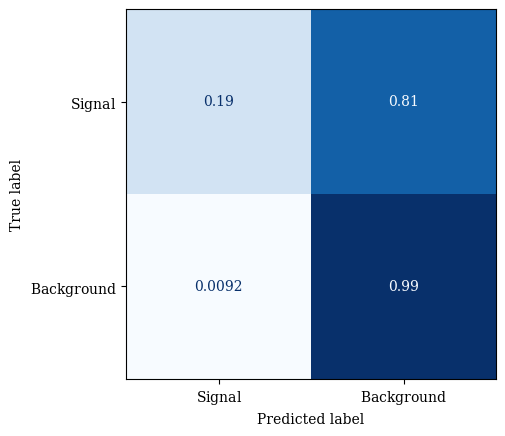

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.89

# Convert probabilities to binary predictions:
# If p > threshold, predict 1 (signal); otherwise, predict 0 (background)
preds2 = [1 if p > threshold else 0 for p in probs2]

# Compute the confusion matrix with the desired label ordering:
# Here, labels=[1, 0] will place signal (1) in the top row and background (0) in the bottom row.
cm = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix with display labels in LaTeX format
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp.plot(cmap=plt.cm.Blues)

# Set the title in LaTeX format

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

plt.show()


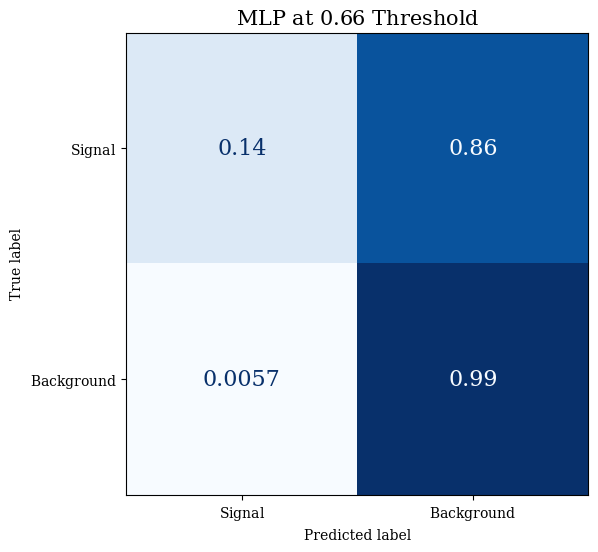

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='true')

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Increase the font size of the numbers in the boxes
for text in ax.texts:
    text.set_fontsize(16)

if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

plt.title(r"$\text{MLP at 0.66 Threshold}$", fontsize=15)
plt.show()


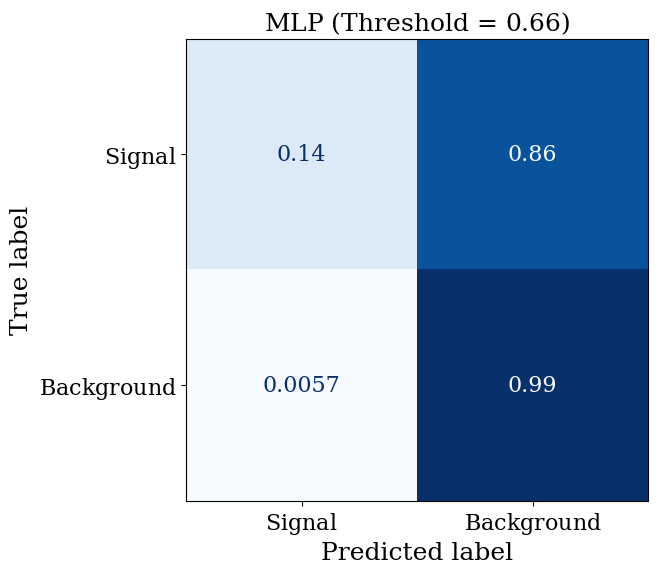

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='true')

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Increase the font size of the numbers in the boxes
for text in ax.texts:
    text.set_fontsize(16)

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

# Increase font sizes for tick labels and axis labels
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.title(r"$\text{MLP (Threshold = 0.66)}$", fontsize=18)
plt.show()


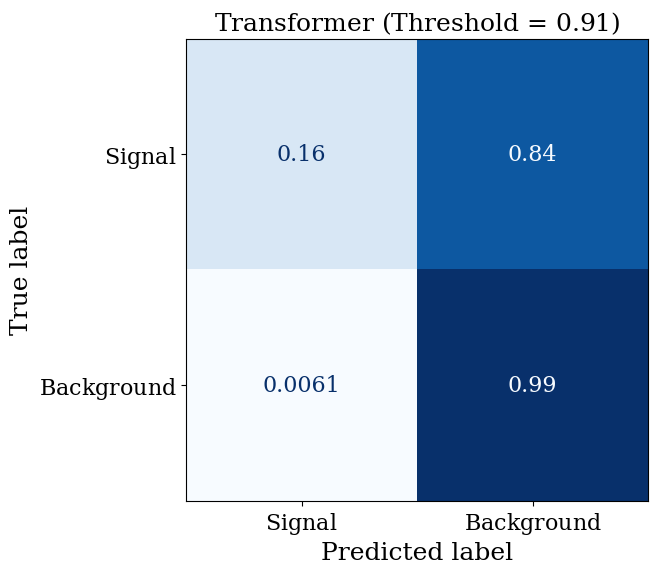

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.91
preds2 = [1 if p > threshold else 0 for p in probs2]

# Compute normalized confusion matrix with custom label order:
cm = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='true')

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Increase the font size of the numbers in the boxes
for text in ax.texts:
    text.set_fontsize(16)

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

# Increase font sizes for tick labels and axis labels
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

plt.title(r"$\text{Transformer (Threshold = 0.91)}$", fontsize=18)
plt.show()


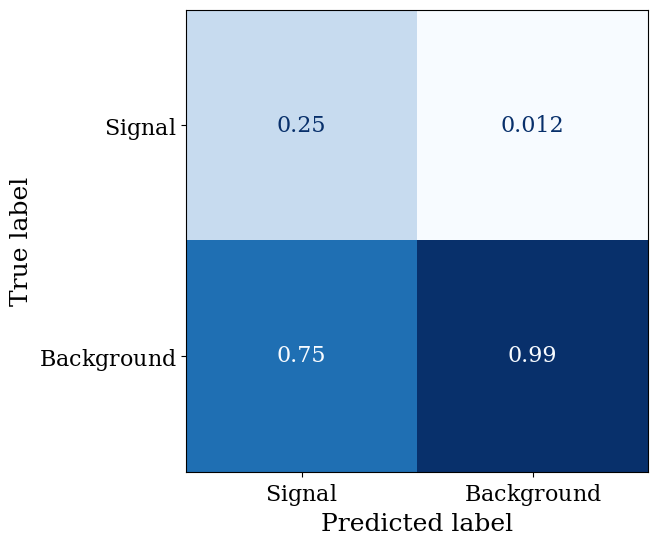

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='pred')

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Increase the font size of the numbers in the boxes
for text in ax.texts:
    text.set_fontsize(16)

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

# Increase font sizes for tick labels and axis labels
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

# plt.title(r"$\text{MLP (Threshold = 0.66)}$", fontsize=18)
plt.show()


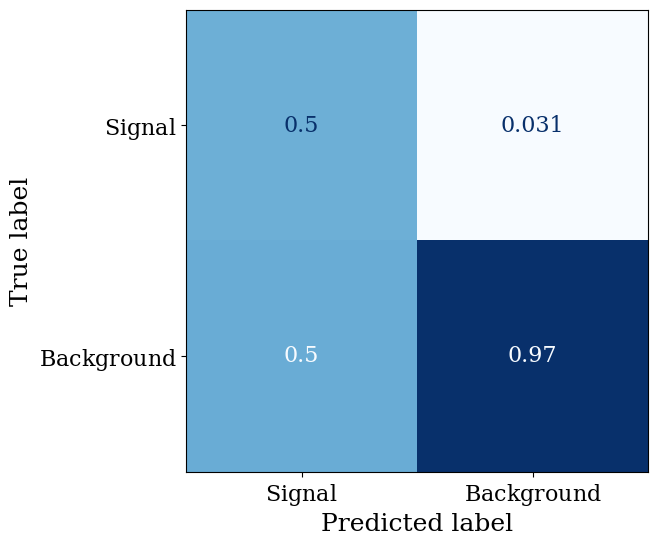

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold
threshold = 0.91
preds2 = [1 if p > threshold else 0 for p in probs2]

# Compute normalized confusion matrix with custom label order:
cm = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='pred')

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap=plt.cm.Blues)

# Increase the font size of the numbers in the boxes
for text in ax.texts:
    text.set_fontsize(16)

# Remove the colorbar if it exists
if hasattr(disp.im_, 'colorbar') and disp.im_.colorbar is not None:
    disp.im_.colorbar.remove()

# Increase font sizes for tick labels and axis labels
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)

# plt.title(r"$\text{Transformer (Threshold = 0.91)}$", fontsize=18)
plt.show()


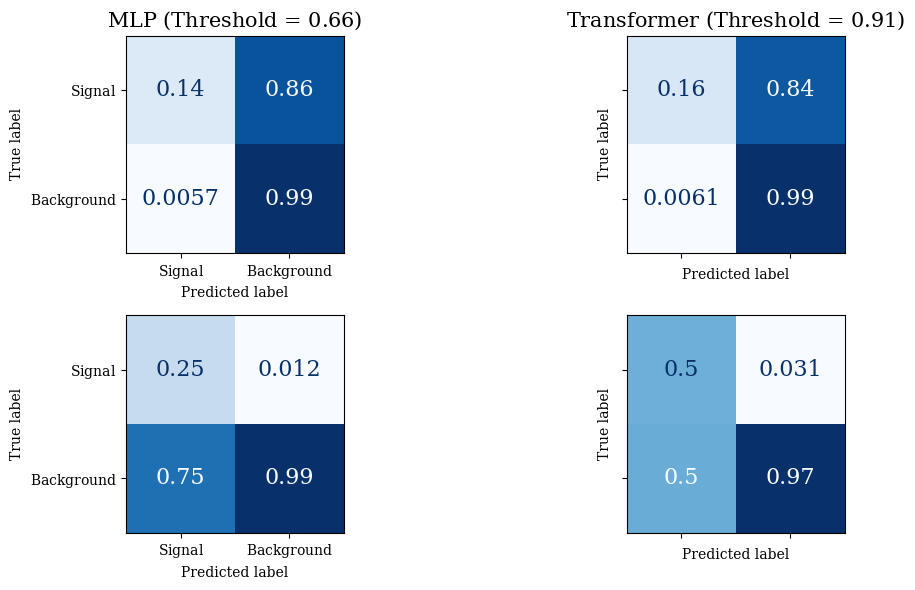

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold and compute predictions
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
# labels=[1, 0] means Signal is on the top row, Background on the bottom row.
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='true')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# First plot: MLP at 0.66 Threshold
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp1.plot(ax=axes[0,0], cmap=plt.cm.Blues)
# Increase font size for the numbers in the boxes
for text in axes[0,0].texts:
    text.set_fontsize(16)
# Remove the colorbar if it exists
if hasattr(disp1.im_, 'colorbar') and disp1.im_.colorbar is not None:
    disp1.im_.colorbar.remove()
axes[0,0].set_title(r"$\text{MLP (Threshold = 0.66)}$", fontsize=15)

threshold = 0.91
preds2 = [1 if p > threshold else 0 for p in probs2]
cm2 = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='true')

# Second plot: Duplicate or other model (adjust title as needed)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[r"", ])
disp2.plot(ax=axes[0,1], cmap=plt.cm.Blues)
for text in axes[0,1].texts:
    text.set_fontsize(16)
if hasattr(disp2.im_, 'colorbar') and disp2.im_.colorbar is not None:
    disp2.im_.colorbar.remove()
axes[0,1].set_title(r"$\text{Transformer (Threshold = 0.91)}$", fontsize=15)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold and compute predictions
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
# labels=[1, 0] means Signal is on the top row, Background on the bottom row.
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='pred')


# First plot: MLP at 0.66 Threshold
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp3.plot(ax=axes[1,0], cmap=plt.cm.Blues)
# Increase font size for the numbers in the boxes
for text in axes[1,0].texts:
    text.set_fontsize(16)
# Remove the colorbar if it exists
if hasattr(disp3.im_, 'colorbar') and disp3.im_.colorbar is not None:
    disp3.im_.colorbar.remove()

threshold = 0.91
preds2 = [1 if p > threshold else 0 for p in probs2]
cm2 = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='pred')

# Second plot: Duplicate or other model (adjust title as needed)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[r"", ""])
disp4.plot(ax=axes[1,1], cmap=plt.cm.Blues)
for text in axes[1,1].texts:
    text.set_fontsize(16)
if hasattr(disp4.im_, 'colorbar') and disp4.im_.colorbar is not None:
    disp4.im_.colorbar.remove()

plt.tight_layout()
plt.show()


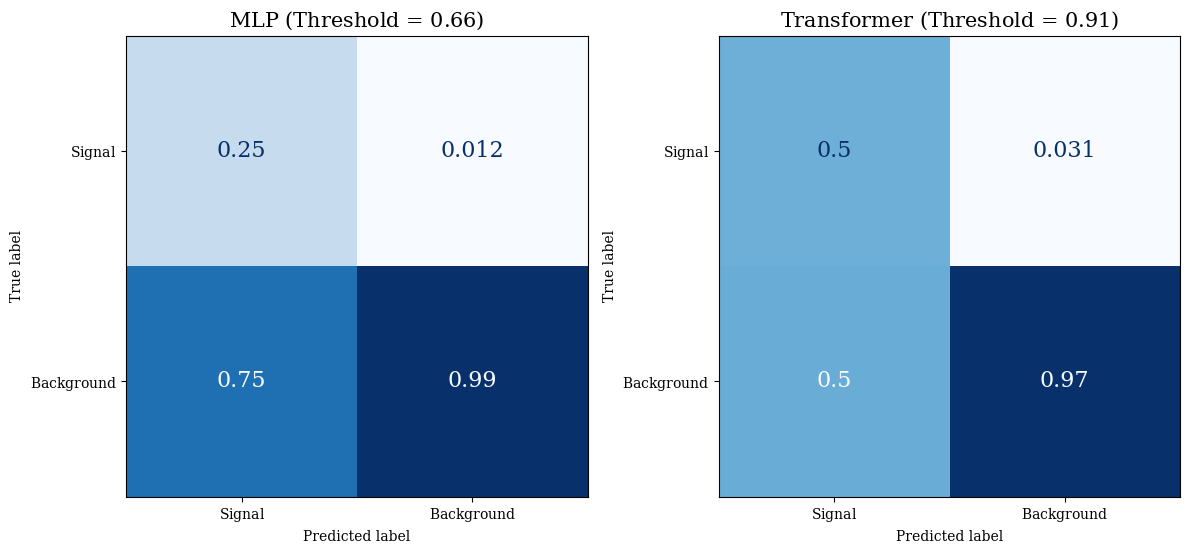

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set threshold and compute predictions
threshold = 0.66
preds = [1 if p > threshold else 0 for p in probs]

# Compute normalized confusion matrix with custom label order:
# labels=[1, 0] means Signal is on the top row, Background on the bottom row.
cm = confusion_matrix(labels, preds, sample_weight=wn, labels=[1, 0], normalize='pred')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot: MLP at 0.66 Threshold
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp1.plot(ax=axes[0], cmap=plt.cm.Blues)
# Increase font size for the numbers in the boxes
for text in axes[0].texts:
    text.set_fontsize(16)
# Remove the colorbar if it exists
if hasattr(disp1.im_, 'colorbar') and disp1.im_.colorbar is not None:
    disp1.im_.colorbar.remove()
axes[0].set_title(r"$\text{MLP (Threshold = 0.66)}$", fontsize=15)

threshold = 0.91
preds2 = [1 if p > threshold else 0 for p in probs2]
cm2 = confusion_matrix(labels2, preds2, sample_weight=wn2, labels=[1, 0], normalize='pred')

# Second plot: Duplicate or other model (adjust title as needed)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[r"$\text{Signal}$", r"$\text{Background}$"])
disp2.plot(ax=axes[1], cmap=plt.cm.Blues)
for text in axes[1].texts:
    text.set_fontsize(16)
if hasattr(disp2.im_, 'colorbar') and disp2.im_.colorbar is not None:
    disp2.im_.colorbar.remove()
axes[1].set_title(r"$\text{Transformer (Threshold = 0.91)}$", fontsize=15)

plt.tight_layout()
plt.show()


## MULTI

In [71]:
import torch
preds = torch.load('/home/pk21271/prep_data/transformer_multi/preds.pt')
labels = torch.load('/home/pk21271/prep_data/transformer_multi/labels.pt')
weights = torch.load('/home/pk21271/prep_data/transformer_multi/weights.pt')

print(weights.sum())

tensor(0.2041)


/tmp/ipykernel_3133229/1459934614.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  preds = torch.load('/home/pk21271/prep_data/transformer_multi/preds.pt')
/tmp/ipykernel

In [72]:
probs = torch.softmax(preds, dim=1).detach().cpu().numpy()
labels = labels.cpu().numpy().squeeze()
weights = weights.cpu().numpy()

In [73]:
labels.shape

(425251,)

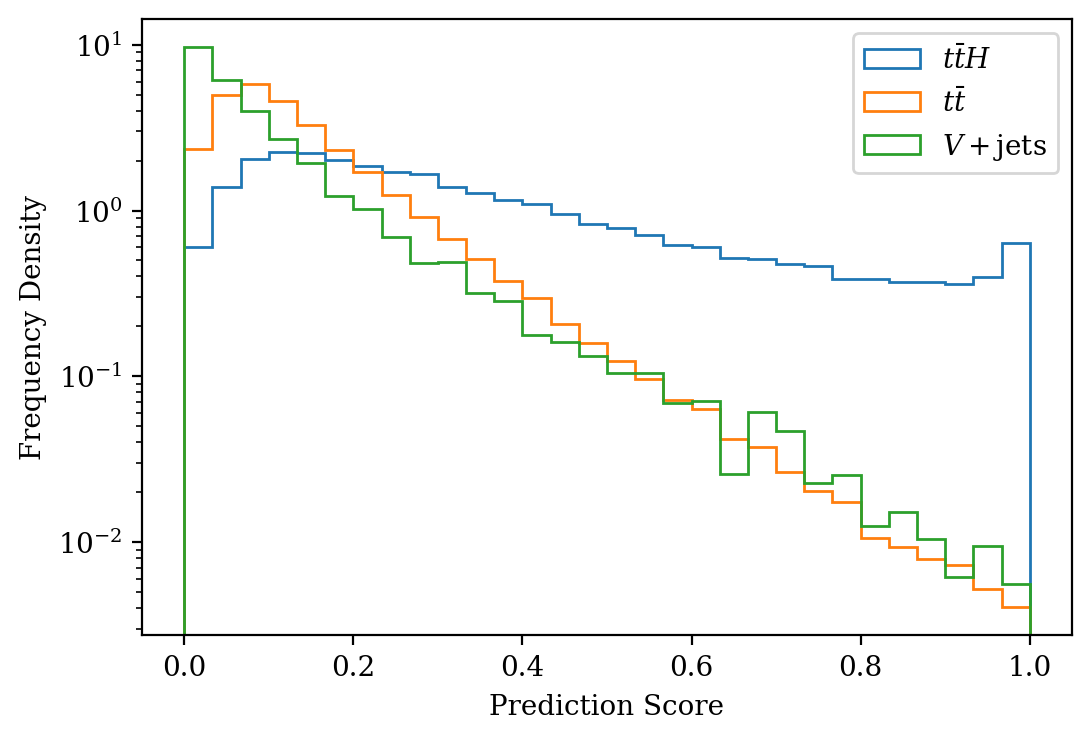

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'mathtext.fontset': 'dejavuserif'
})

bins = np.linspace(0, 1, 31)

plt.figure(figsize=(6, 4), dpi=200)

plt.hist(probs[labels == 0][:, 0], bins=bins, range=(0, 1), histtype='step', density=True, weights=weights[labels == 0], label=r'$t\bar{t}H$')
plt.hist(probs[labels == 1][:, 0], bins=bins, range=(0, 1), histtype='step', density=True, weights=weights[labels == 1], label=r'$t\bar{t}$')
plt.hist(probs[labels == 2][:, 0], bins=bins, range=(0, 1), histtype='step', density=True, weights=weights[labels == 2], label=r'$V + \text{jets}$')
plt.yscale('log')
plt.ylabel('Frequency Density')
plt.xlabel('Prediction Score')
plt.legend()

Text(0.5, 1.0, 'Score of the predicted classes - winner takes all')

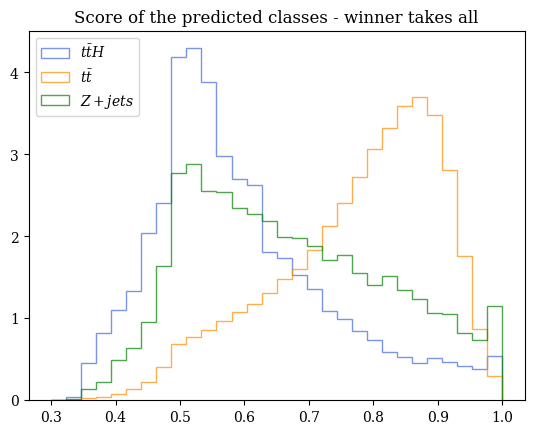

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the predicted class and the maximum probability per sample
predicted_class = np.argmax(probs, axis=1)
max_prob = np.max(probs, axis=1)

bins = np.linspace(0.3, 1, 31)

plt.hist(max_prob[predicted_class == 0], bins=bins, histtype='step', density=True, label=r'$t\bar{t}H$', alpha=0.7, color='royalblue', weights = weights[predicted_class == 0])
plt.hist(max_prob[predicted_class == 1], bins=bins, histtype='step', density=True, label=r'$t\bar{t}$', alpha=0.7, color='darkorange', weights = weights[predicted_class == 1])
plt.hist(max_prob[predicted_class == 2], bins=bins, histtype='step', density=True, label=r'$Z +jets$', alpha=0.7, color='g', weights = weights[predicted_class == 2])

plt.legend()
plt.title('Score of the predicted classes - winner takes all')

In [77]:
probs_flat = np.array(probs[:, 0].flatten())  # Take softmax output for ttH

# Convert labels: ttH (0) → 1 (signal), Others (1,2) → 0 (background)
binary_labels = np.where(labels == 0, 1, 0).flatten()

# Define threshold range
thresholds = np.linspace(0, 1, 101)

40828.887


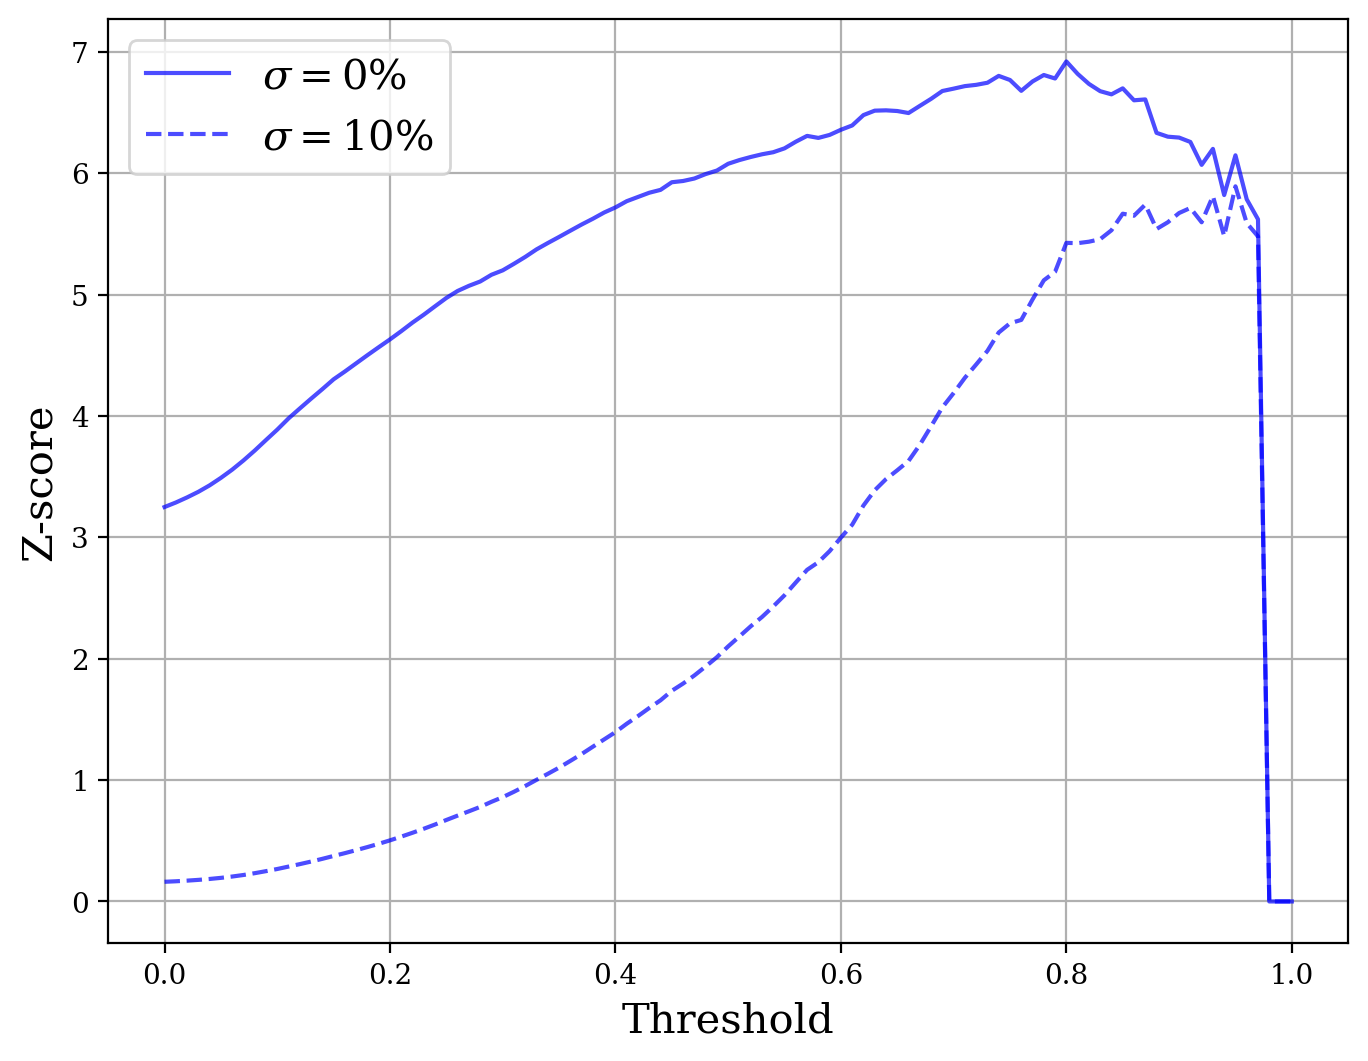

In [90]:
# Assume w_test is the array of weights for each sample in the test set

wn = weights.flatten() * 200000

print(wn.sum())

# Define thresholds between 0 and 1
thresholds = np.linspace(0, 1, 101)
z_scores = []
z_scores_err = []


# Calculate the Z-score for each threshold using weights
for threshold in thresholds:
    # Weighted count of signal predictions above the threshold
    S = np.sum(wn[(probs_flat > threshold) & (binary_labels == 1)])  # Weighted Signal
    B = np.sum(wn[(probs_flat > threshold) & (binary_labels == 0)])  # Weighted Background
    sig_B = B * 0 # 5% error    
    if S and B > 3:
        Z = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z = 0

    sig_B = B * 0.1 # 5% error    
    if S and B > 3:
        Z_err = S / np.sqrt(B + sig_B**2 + 1e-10)
    else:
        Z_err = 0

    z_scores.append(Z)
    z_scores_err.append(Z_err)

plt.figure(figsize=(8, 6), dpi=200)

# Plot Z-score vs. Threshold
plt.plot(thresholds, z_scores, label=r"$\sigma = 0\%$", color='blue', alpha = 0.7)
plt.plot(thresholds, z_scores_err, label=r"$\sigma = 10\%$", color='blue', linestyle='--', alpha = 0.7)


# plt.plot(thresholds, z_scores, label=r"$\sigma = 0\%$", color='blue', alpha = 1)
# plt.plot(thresholds, z_scores_err, label=r"$\sigma = 10\%$", color='blue', linestyle='--', alpha = 1)


plt.xlabel("Threshold", fontsize=15)
plt.ylabel("Z-score", fontsize=15)
plt.grid()
# plt.ylim(0,8)
# plt.xlim(0,15
plt.legend(fontsize = 15)
plt.show()

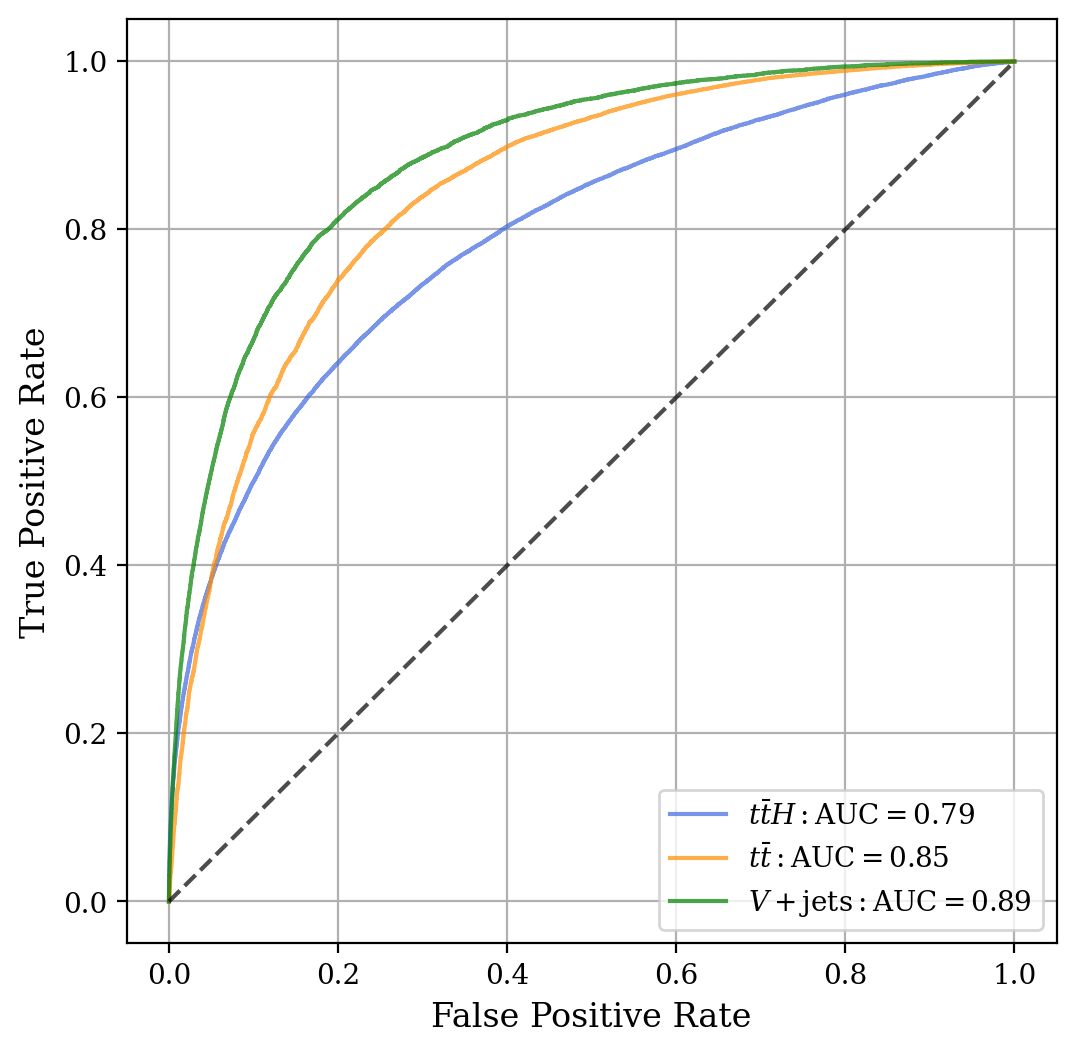

In [ ]:
# PLot a roc curve for each class

from sklearn.metrics import roc_curve, roc_auc_score

binary_labels1 = np.where(labels == 0, 1, 0).flatten()
binary_labels2 = np.where(labels == 1, 1, 0).flatten()
binary_labels3 = np.where(labels == 2, 1, 0).flatten()

probs_flat1 = probs[:, 0].flatten()
probs_flat2 = probs[:, 1].flatten()
probs_flat3 = probs[:, 2].flatten()

fpr, tpr, _ = roc_curve(binary_labels1, probs_flat1, sample_weight=wn)
auc = roc_auc_score(binary_labels1, probs_flat1, sample_weight=wn)

fpr2, tpr2, _2 = roc_curve(binary_labels2, probs_flat2, sample_weight=wn)
auc2 = roc_auc_score(binary_labels2, probs_flat2, sample_weight=wn)

fpr3, tpr3, _3 = roc_curve(binary_labels3, probs_flat3, sample_weight=wn)
auc3 = roc_auc_score(binary_labels3, probs_flat3, sample_weight=wn)

plt.figure(figsize=(6, 6), dpi = 200)

plt.plot(fpr, tpr, label=r"$t\bar{t}H: \text{AUC}    = 0.79$", color='royalblue', alpha = 0.7)
plt.plot(fpr2, tpr2, label=r"$t\bar{t}: \text{AUC}    = 0.85$", color='darkorange', alpha = 0.7)
plt.plot(fpr3, tpr3, label=r"$V + \text{jets}: \text{AUC} = 0.89$", color='g', alpha = 0.7)

test = np.linspace(0, 1, 101)

plt.plot(test, test, linestyle='--', color='black', alpha = 0.7)



plt.legend()
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.grid()